# Modules

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from statsmodels.iolib.summary2 import summary_col

# Multiplex/year regressions

## Import and adjust

In [2]:
# import
tds_1719 = pd.read_csv('SCB_Complexo x Ano - 2017 a 2019 - mesclado fiscalização.csv')
est_1719 = pd.read_csv('SCB_Complexo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv')
bras_1719 = pd.read_csv('SCB_Complexo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv')

In [3]:
tds_1719.columns = est_1719.columns = bras_1719.columns = ['ANO_CINEMATOGRAFICO', 'QTDE_DIF_TIT_EXIB', 'QTDE_DIF_TIT_EXIB_BR',
       'QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA', 'QTDE_SESSOES',
       'DIAS_FUNCIONAMENTO', 'TOT_SALAS_FUNC', 'QTD_SALAS_NUNIQUE',
       'SALAS_COMPLEXO_INFERIDO', 'ASSENTOS_COMPLEXO_INFERIDO', 'UF_COMPLEXO',
       'OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS',
       'TRANSF_FLAG', 'CUMPRIU_COTA', 'TOTAL_SALAS', 'DIAS_FUNC_INFERIDOS',
       'CUMP_QUADRATIC', 'CUMPRIMENTO_PROPORCIONAL',
       'CUMP_LINEAR', 'CUMP_TRIWEIGHT',
       'CUMP_NORMALIZADO', 'REGISTRO_COMPLEXO', 'REG_EMPRESA',
       'REGISTRO_GRUPO', 'CEP_COMPLEXO', 'MUN_COMPLEXO']

In [4]:
# defining data w/o 2019 to account for possible problems with 2019 having no screen quota
tds_1718 = tds_1719[tds_1719.ANO_CINEMATOGRAFICO != 2019]
est_1718 = est_1719[est_1719.ANO_CINEMATOGRAFICO != 2019]
bras_1718 = bras_1719[bras_1719.ANO_CINEMATOGRAFICO != 2019]

## Naïve regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [5]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_n1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n3 = smf.ols(formula = formul, data=data[2]).fit()

In [6]:
pd.read_html(reg_n1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.00005,0.001,-0.071,0.944
DIAS_FUNCIONAMENTO,0.00660,0.000,45.777,0.000


In [7]:
pd.read_html(reg_n2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.000012,0.001,-0.017,0.987
DIAS_FUNCIONAMENTO,0.006600,0.000,43.628,0.000


In [8]:
pd.read_html(reg_n3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0010,0.001,0.689,0.491
DIAS_FUNCIONAMENTO,0.0057,0.000,18.021,0.000


##### 2017-2018

In [9]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_n4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n6 = smf.ols(formula = formul, data=data[2]).fit()

In [10]:
pd.read_html(reg_n4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0012,0.001,-0.826,0.409
DIAS_FUNCIONAMENTO,0.0068,0.000,28.197,0.000


In [11]:
pd.read_html(reg_n5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0004,0.001,-0.248,0.804
DIAS_FUNCIONAMENTO,0.0068,0.000,28.272,0.000


In [12]:
pd.read_html(reg_n6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0039,0.003,-1.199,0.231
DIAS_FUNCIONAMENTO,0.0053,0.001,8.766,0.000


#### Without entity fixed-effects

##### 2017-2019

In [13]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

data = [tds_1719, est_1719, bras_1719]

# all
reg_n7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n9 = smf.ols(formula = formul, data=data[2]).fit()

In [14]:
pd.read_html(reg_n7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002000,3.718,0.0
DIAS_FUNCIONAMENTO,0.0098,0.000000,32.408,0.0
SALAS_COMPLEXO_INFERIDO,0.2298,0.017000,13.233,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000066,6.016,0.0


In [15]:
pd.read_html(reg_n8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.002000,2.668,0.008
DIAS_FUNCIONAMENTO,0.0106,0.000000,30.029,0.000
SALAS_COMPLEXO_INFERIDO,0.2434,0.020000,12.171,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000076,5.286,0.000


In [16]:
pd.read_html(reg_n9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0159,0.002000,7.349,0.0
DIAS_FUNCIONAMENTO,0.0074,0.000000,20.889,0.0
SALAS_COMPLEXO_INFERIDO,0.2101,0.020000,10.578,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000075,5.344,0.0


##### 2017-2018

In [17]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

data = [tds_1718, est_1718, bras_1718]

# all
reg_n10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_n11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_n12 = smf.ols(formula = formul, data=data[2]).fit()

In [18]:
pd.read_html(reg_n10.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0094,0.002000,4.224,0.0
DIAS_FUNCIONAMENTO,0.0092,0.000000,19.665,0.0
SALAS_COMPLEXO_INFERIDO,0.2206,0.022000,9.988,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000083,4.790,0.0


In [19]:
pd.read_html(reg_n11.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0088,0.003000,3.471,0.001
DIAS_FUNCIONAMENTO,0.0099,0.001000,18.407,0.000
SALAS_COMPLEXO_INFERIDO,0.2312,0.025000,9.275,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000093,4.351,0.000


In [20]:
pd.read_html(reg_n12.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0189,0.003000,7.188,0.0
DIAS_FUNCIONAMENTO,0.0067,0.001000,12.062,0.0
SALAS_COMPLEXO_INFERIDO,0.1939,0.026000,7.462,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000097,4.242,0.0


### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [21]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

data = [tds_1719, est_1719, bras_1719]

# all
reg_np1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np3 = smf.ols(formula = formul, data=data[2]).fit()

In [22]:
pd.read_html(reg_np1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0008,0.001,1.229,0.219
DIAS_FUNCIONAMENTO,0.0065,0.000,50.858,0.000


In [23]:
pd.read_html(reg_np2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0009,0.001,1.252,0.211
DIAS_FUNCIONAMENTO,0.0065,0.000,46.829,0.000


In [24]:
pd.read_html(reg_np3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0018,0.001,1.339,0.181
DIAS_FUNCIONAMENTO,0.0057,0.000,19.206,0.000


##### 2017-2018

In [25]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_np4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np6 = smf.ols(formula = formul, data=data[2]).fit()

In [26]:
pd.read_html(reg_np4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0004,0.001,-0.289,0.772
DIAS_FUNCIONAMENTO,0.0068,0.000,32.317,0.000


In [27]:
pd.read_html(reg_np5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0005,0.001,0.389,0.698
DIAS_FUNCIONAMENTO,0.0068,0.000,31.264,0.000


In [28]:
pd.read_html(reg_np6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0035,0.003,-1.171,0.242
DIAS_FUNCIONAMENTO,0.0055,0.001,9.711,0.000


#### Without entity fixed-effects

In [29]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

##### 2017-2019

In [30]:
data = [tds_1719, est_1719, bras_1719]

# all
reg_np7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np9 = smf.ols(formula = formul, data=data[2]).fit()

In [31]:
pd.read_html(reg_np7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0091,0.002000,5.801,0.0
DIAS_FUNCIONAMENTO,0.0091,0.000000,36.134,0.0
SALAS_COMPLEXO_INFERIDO,0.1606,0.015000,11.077,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000055,8.533,0.0


In [32]:
pd.read_html(reg_np8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0080,0.002000,4.229,0.0
DIAS_FUNCIONAMENTO,0.0100,0.000000,32.640,0.0
SALAS_COMPLEXO_INFERIDO,0.1757,0.017000,10.134,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,7.025,0.0


In [33]:
pd.read_html(reg_np9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0176,0.002000,8.588,0.0
DIAS_FUNCIONAMENTO,0.0069,0.000000,20.538,0.0
SALAS_COMPLEXO_INFERIDO,0.1441,0.019000,7.662,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000071,7.334,0.0


##### 2017-2018

In [34]:
data = [tds_1718, est_1718, bras_1718]

# all
reg_np10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_np11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_np12 = smf.ols(formula = formul, data=data[2]).fit()

In [35]:
pd.read_html(reg_n7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002000,3.718,0.0
DIAS_FUNCIONAMENTO,0.0098,0.000000,32.408,0.0
SALAS_COMPLEXO_INFERIDO,0.2298,0.017000,13.233,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000066,6.016,0.0


In [36]:
pd.read_html(reg_n8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.002000,2.668,0.008
DIAS_FUNCIONAMENTO,0.0106,0.000000,30.029,0.000
SALAS_COMPLEXO_INFERIDO,0.2434,0.020000,12.171,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000076,5.286,0.000


In [37]:
pd.read_html(reg_n9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0159,0.002000,7.349,0.0
DIAS_FUNCIONAMENTO,0.0074,0.000000,20.889,0.0
SALAS_COMPLEXO_INFERIDO,0.2101,0.020000,10.578,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000075,5.344,0.0


### Dependent variable: different titles

#### With entity fixed-effects

##### 2017-2019

In [38]:
formul_1 = 'QTDE_DIF_TIT_EXIB ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
formul_2 = 'QTDE_DIF_TIT_EXIB_EST ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
formul_3 = 'QTDE_DIF_TIT_EXIB_BR ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

data = [tds_1719]

# all
reg_nt1 = smf.ols(formula = formul_1, data=data[0]).fit()

# foreign
reg_nt2 = smf.ols(formula = formul_2, data=data[0]).fit()

# Brazilian
reg_nt3 = smf.ols(formula = formul_3, data=data[0]).fit()

In [39]:
pd.read_html(reg_nt1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0256,0.027,0.958,0.338
DIAS_FUNCIONAMENTO,0.2045,0.005,37.974,0.000


In [40]:
pd.read_html(reg_nt2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0041,0.021,-0.191,0.849
DIAS_FUNCIONAMENTO,0.1694,0.004,39.194,0.000


In [41]:
pd.read_html(reg_nt3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0297,0.012,2.551,0.011
DIAS_FUNCIONAMENTO,0.0350,0.002,14.951,0.000


##### 2017-2018

In [43]:
data = [tds_1718]

# all
reg_nt4 = smf.ols(formula = formul_1, data=data[0]).fit()

# foreign
reg_nt5 = smf.ols(formula = formul_2, data=data[0]).fit()

# Brazilian
reg_nt6 = smf.ols(formula = formul_3, data=data[0]).fit()

In [44]:
pd.read_html(reg_nt4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.1233,0.042,2.956,0.003
DIAS_FUNCIONAMENTO,0.1671,0.007,23.693,0.000


In [45]:
pd.read_html(reg_nt5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.1503,0.034,4.419,0.0
DIAS_FUNCIONAMENTO,0.1350,0.006,23.462,0.0


In [46]:
pd.read_html(reg_nt6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0271,0.021,-1.309,0.191
DIAS_FUNCIONAMENTO,0.0321,0.003,9.180,0.000


#### Without entity fixed-effects

In [47]:
var1 = 'QTDE_DIF_TIT_EXIB '
var2 = 'QTDE_DIF_TIT_EXIB_EST '
var3 = 'QTDE_DIF_TIT_EXIB_BR '

suffix = '~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'

f1 = var1 + suffix
f2 = var2 + suffix
f3 = var3 + suffix

##### 2017-2019

In [48]:
data = [tds_1719]

# all
reg_nt7 = smf.ols(formula = f1, data=data[0]).fit()

# foreign
reg_nt8 = smf.ols(formula = f2, data=data[0]).fit()

# Brazilian
reg_nt9 = smf.ols(formula = f3, data=data[0]).fit()

In [49]:
pd.read_html(reg_nt7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0052,0.081,-0.064,0.949
DIAS_FUNCIONAMENTO,0.2201,0.013,16.906,0.000
SALAS_COMPLEXO_INFERIDO,14.8738,0.747,19.914,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0202,0.003,-7.110,0.000


In [50]:
pd.read_html(reg_nt8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0399,0.056,-0.715,0.475
DIAS_FUNCIONAMENTO,0.1922,0.009,21.439,0.000
SALAS_COMPLEXO_INFERIDO,11.5152,0.514,22.400,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0147,0.002,-7.535,0.000


In [51]:
pd.read_html(reg_nt9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0348,0.034,1.017,0.309
DIAS_FUNCIONAMENTO,0.0280,0.005,5.100,0.000
SALAS_COMPLEXO_INFERIDO,3.3586,0.315,10.670,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0055,0.001,-4.565,0.000


##### 2017-2018

In [52]:
data = [tds_1718]

# all
reg_nt10 = smf.ols(formula = f1, data=data[0]).fit()

# foreign
reg_nt11 = smf.ols(formula = f2, data=data[0]).fit()

# Brazilian
reg_nt12 = smf.ols(formula = f3, data=data[0]).fit()

In [53]:
pd.read_html(reg_nt10.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0302,0.096,0.316,0.752
DIAS_FUNCIONAMENTO,0.2013,0.020,10.012,0.000
SALAS_COMPLEXO_INFERIDO,15.6463,0.947,16.529,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0226,0.004,-6.373,0.000


In [54]:
pd.read_html(reg_nt11.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,-0.0242,0.066,-0.364,0.716
DIAS_FUNCIONAMENTO,0.1834,0.014,13.151,0.000
SALAS_COMPLEXO_INFERIDO,11.7658,0.656,17.926,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0153,0.002,-6.242,0.000


In [55]:
pd.read_html(reg_nt12.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
OBRIGAÇÃO_FINAL_POR_SALA,0.0544,0.040,1.372,0.170
DIAS_FUNCIONAMENTO,0.0180,0.008,2.158,0.031
SALAS_COMPLEXO_INFERIDO,3.8804,0.392,9.905,0.000
ASSENTOS_COMPLEXO_INFERIDO,-0.0072,0.001,-4.940,0.000


## Weighted regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions), futher define nominal screen quota obligation $SQ$ and compliance level (quota fulfilled / quota due) as $C_{it}$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \beta_2 C_{it} + \beta_3 SQ_{it} * f(C_{it}) + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. $f(.)$ is the chosen weighting function (kernel). Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [82]:
formul = 'np.log(RENDA) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w1 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w2 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w3 = smf.ols(formula = formul, data=data[2]).fit()

In [83]:
pd.read_html(reg_w1.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.6236,0.082,7.559,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0091,0.002,4.857,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0126,0.002,-5.839,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,44.765,0.0


In [84]:
pd.read_html(reg_w2.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.6011,0.090,6.696,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0102,0.002,5.039,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0134,0.002,-5.781,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,42.514,0.0


In [85]:
pd.read_html(reg_w3.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.1596,0.190,0.841,0.401
OBRIGAÇÃO_FINAL_POR_SALA,-0.0142,0.004,-3.476,0.001
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0153,0.005,3.211,0.001
DIAS_FUNCIONAMENTO,0.0056,0.000,18.301,0.000


###### Normal pdf kernel

In [86]:
formul = 'np.log(RENDA) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w4 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w5 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w6 = smf.ols(formula = formul, data=data[2]).fit()

In [87]:
pd.read_html(reg_w4.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.8771,0.344,5.453,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0129,0.004,3.391,0.001
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0378,0.010,-3.705,0.000
DIAS_FUNCIONAMENTO,0.0065,0.000,45.237,0.000


In [88]:
pd.read_html(reg_w5.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,2.2833,0.403,5.664,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0199,0.004,4.602,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0558,0.012,-4.816,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,42.915,0.0


In [89]:
pd.read_html(reg_w6.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-1.6596,0.710,-2.336,0.02
OBRIGAÇÃO_FINAL_POR_SALA,-0.0447,0.008,-5.752,0.00
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1196,0.021,5.731,0.00
DIAS_FUNCIONAMENTO,0.0057,0.000,18.503,0.00


###### Triangular kernel

In [90]:
formul = 'np.log(RENDA) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w7 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w8 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w9 = smf.ols(formula = formul, data=data[2]).fit()

In [91]:
pd.read_html(reg_w7.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.5849,0.083,7.019,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.001,4.012,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0103,0.002,-5.494,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,45.090,0.0


In [92]:
pd.read_html(reg_w8.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.5259,0.090,5.852,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0061,0.002,3.969,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0102,0.002,-5.061,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,42.808,0.0


In [93]:
pd.read_html(reg_w9.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.6319,0.180,3.512,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0041,0.003,-1.356,0.175
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0020,0.004,0.506,0.613
DIAS_FUNCIONAMENTO,0.0056,0.000,18.397,0.000


###### Triweight kernel

In [94]:
formul = 'np.log(RENDA) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w10 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w11 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w12 = smf.ols(formula = formul, data=data[2]).fit()

In [95]:
pd.read_html(reg_w10.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.4494,0.072,6.280,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0042,0.001,3.398,0.001
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0080,0.002,-4.995,0.000
DIAS_FUNCIONAMENTO,0.0065,0.000,45.537,0.000


In [96]:
pd.read_html(reg_w11.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.3864,0.077,5.045,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0044,0.001,3.306,0.001
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0076,0.002,-4.474,0.000
DIAS_FUNCIONAMENTO,0.0065,0.000,43.264,0.000


In [97]:
pd.read_html(reg_w12.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.6626,0.149,4.452,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0019,0.003,-0.761,0.447
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0008,0.003,-0.260,0.795
DIAS_FUNCIONAMENTO,0.0056,0.000,18.457,0.000


##### 2017-2018

###### Quadratic kernel

In [98]:
formul = 'np.log(RENDA) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w13 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w14 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w15 = smf.ols(formula = formul, data=data[2]).fit()

In [99]:
pd.read_html(reg_w13.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.6775,0.114,5.919,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0105,0.003,4.033,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0156,0.003,-5.213,0.0
DIAS_FUNCIONAMENTO,0.0065,0.000,26.768,0.0


In [100]:
pd.read_html(reg_w14.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.7269,0.115,6.331,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0132,0.003,5.036,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0182,0.003,-6.036,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,27.010,0.0


In [101]:
pd.read_html(reg_w15.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.2627,0.296,0.888,0.375
OBRIGAÇÃO_FINAL_POR_SALA,-0.0166,0.006,-2.637,0.009
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0190,0.007,2.538,0.011
DIAS_FUNCIONAMENTO,0.0046,0.001,7.823,0.000


###### Normal pdf kernel

In [102]:
formul = 'np.log(RENDA) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w16 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w17 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w18 = smf.ols(formula = formul, data=data[2]).fit()

In [103]:
pd.read_html(reg_w16.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.6071,0.501,3.210,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0135,0.005,2.562,0.011
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0420,0.014,-2.897,0.004
DIAS_FUNCIONAMENTO,0.0067,0.000,27.329,0.000


In [104]:
pd.read_html(reg_w17.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,2.6374,0.506,5.212,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0249,0.005,4.633,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0721,0.015,-4.876,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,27.450,0.0


In [105]:
pd.read_html(reg_w18.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-2.0805,1.160,-1.794,0.073
OBRIGAÇÃO_FINAL_POR_SALA,-0.0575,0.012,-4.796,0.000
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1533,0.033,4.617,0.000
DIAS_FUNCIONAMENTO,0.0050,0.001,8.431,0.000


###### Triangular kernel

In [106]:
formul = 'np.log(RENDA) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w19 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w20 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w21 = smf.ols(formula = formul, data=data[2]).fit()

In [107]:
pd.read_html(reg_w19.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.6427,0.115,5.574,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.002,3.257,0.001
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0132,0.003,-4.927,0.000
DIAS_FUNCIONAMENTO,0.0066,0.000,27.162,0.000


In [108]:
pd.read_html(reg_w20.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.6389,0.116,5.513,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0087,0.002,4.023,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0147,0.003,-5.456,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,27.401,0.0


In [109]:
pd.read_html(reg_w21.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.8211,0.275,2.982,0.003
OBRIGAÇÃO_FINAL_POR_SALA,-0.0056,0.005,-1.133,0.258
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0042,0.006,0.673,0.501
DIAS_FUNCIONAMENTO,0.0047,0.001,8.014,0.000


###### Triweight kernel

In [110]:
formul = 'np.log(RENDA) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w22 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w23 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w24 = smf.ols(formula = formul, data=data[2]).fit()

In [111]:
pd.read_html(reg_w22.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.4841,0.097,4.970,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0046,0.002,2.470,0.014
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0102,0.002,-4.525,0.000
DIAS_FUNCIONAMENTO,0.0067,0.000,27.731,0.000


In [112]:
pd.read_html(reg_w23.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.4582,0.098,4.679,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0058,0.002,3.068,0.002
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0110,0.002,-4.865,0.000
DIAS_FUNCIONAMENTO,0.0068,0.000,28.005,0.000


In [113]:
pd.read_html(reg_w24.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.8074,0.224,3.604,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0024,0.004,-0.575,0.566
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0009,0.005,0.176,0.860
DIAS_FUNCIONAMENTO,0.0046,0.001,7.918,0.000


#### Without entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [114]:
formul = 'np.log(RENDA) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w25 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w26 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w27 = smf.ols(formula = formul, data=data[2]).fit()

In [115]:
pd.read_html(reg_w25.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.9849,0.200000,4.915,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0055,0.004000,1.237,0.216
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0033,0.005000,-0.650,0.516
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.227,0.000
SALAS_COMPLEXO_INFERIDO,0.2134,0.017000,12.472,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.489,0.000


In [116]:
pd.read_html(reg_w26.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,1.3636,0.232000,5.866,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0078,0.005000,1.517,0.129
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0087,0.006000,-1.484,0.138
DIAS_FUNCIONAMENTO,0.0101,0.000000,28.948,0.000
SALAS_COMPLEXO_INFERIDO,0.2248,0.020000,11.459,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000074,5.768,0.000


In [117]:
pd.read_html(reg_w27.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,-0.3221,0.237000,-1.360,0.174
OBRIGAÇÃO_FINAL_POR_SALA,-0.0080,0.005000,-1.550,0.121
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0270,0.006000,4.549,0.000
DIAS_FUNCIONAMENTO,0.0072,0.000000,20.432,0.000
SALAS_COMPLEXO_INFERIDO,0.1908,0.020000,9.659,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000074,5.619,0.000


###### Normal pdf kernel

In [118]:
formul = 'np.log(RENDA) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w28 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w29 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w30 = smf.ols(formula = formul, data=data[2]).fit()

In [119]:
pd.read_html(reg_w28.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,2.8144,0.723000,3.895,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0108,0.008000,-1.297,0.195
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0347,0.022000,1.546,0.122
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.795,0.000
SALAS_COMPLEXO_INFERIDO,0.2104,0.017000,12.467,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000063,6.536,0.000


In [120]:
pd.read_html(reg_w29.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,4.6488,0.853000,5.449,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0072,0.010000,-0.738,0.461
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0170,0.026000,0.648,0.517
DIAS_FUNCIONAMENTO,0.0101,0.000000,29.702,0.000
SALAS_COMPLEXO_INFERIDO,0.2201,0.019000,11.466,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000072,5.861,0.000


In [121]:
pd.read_html(reg_w30.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-3.1058,0.848000,-3.663,0.0
OBRIGAÇÃO_FINAL_POR_SALA,-0.0391,0.010000,-4.000,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1486,0.026000,5.644,0.0
DIAS_FUNCIONAMENTO,0.0075,0.000000,20.994,0.0
SALAS_COMPLEXO_INFERIDO,0.1944,0.020000,9.828,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000074,5.503,0.0


###### Triangular kernel

In [122]:
formul = 'np.log(RENDA) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w31 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w32 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w33 = smf.ols(formula = formul, data=data[2]).fit()

In [123]:
pd.read_html(reg_w31.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,1.4171,0.207000,6.859,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0119,0.003000,3.506,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0136,0.004000,-3.121,0.002
DIAS_FUNCIONAMENTO,0.0093,0.000000,31.436,0.000
SALAS_COMPLEXO_INFERIDO,0.2111,0.017000,12.430,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.547,0.000


In [124]:
pd.read_html(reg_w32.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,1.7959,0.240000,7.494,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0142,0.004000,3.617,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0197,0.005000,-3.899,0.0
DIAS_FUNCIONAMENTO,0.0101,0.000000,29.136,0.0
SALAS_COMPLEXO_INFERIDO,0.2229,0.020000,11.415,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000073,5.795,0.0


In [125]:
pd.read_html(reg_w33.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.3137,0.243000,1.290,0.197
OBRIGAÇÃO_FINAL_POR_SALA,0.0055,0.004000,1.397,0.163
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0108,0.005000,2.107,0.035
DIAS_FUNCIONAMENTO,0.0071,0.000000,20.253,0.000
SALAS_COMPLEXO_INFERIDO,0.1891,0.020000,9.598,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000074,5.657,0.000


###### Triweight kernel

In [126]:
formul = 'np.log(RENDA) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w34 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w35 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w36 = smf.ols(formula = formul, data=data[2]).fit()

In [127]:
pd.read_html(reg_w34.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.3488,0.186000,7.232,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0133,0.003000,4.406,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0152,0.004000,-3.987,0.0
DIAS_FUNCIONAMENTO,0.0094,0.000000,31.632,0.0
SALAS_COMPLEXO_INFERIDO,0.2128,0.017000,12.506,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000064,6.505,0.0


In [128]:
pd.read_html(reg_w35.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.6678,0.216000,7.720,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0152,0.003000,4.351,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0206,0.004000,-4.667,0.0
DIAS_FUNCIONAMENTO,0.0101,0.000000,29.333,0.0
SALAS_COMPLEXO_INFERIDO,0.2250,0.020000,11.498,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000073,5.746,0.0


In [129]:
pd.read_html(reg_w36.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.4597,0.217000,2.115,0.035
OBRIGAÇÃO_FINAL_POR_SALA,0.0089,0.004000,2.537,0.011
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0061,0.004000,1.384,0.167
DIAS_FUNCIONAMENTO,0.0071,0.000000,20.226,0.000
SALAS_COMPLEXO_INFERIDO,0.1881,0.020000,9.573,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000074,5.679,0.000


##### 2017-2018

###### Quadratic kernel

In [130]:
formul = 'np.log(RENDA) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w36 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w37 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w38 = smf.ols(formula = formul, data=data[2]).fit()

In [131]:
pd.read_html(reg_w36.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,1.1182,0.198000,5.639,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0096,0.004000,2.168,0.030
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0021,0.005000,-0.422,0.673
DIAS_FUNCIONAMENTO,0.0078,0.000000,16.762,0.000
SALAS_COMPLEXO_INFERIDO,0.1861,0.021000,8.711,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000078,5.444,0.000


In [132]:
pd.read_html(reg_w37.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,1.5105,0.224000,6.754,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0125,0.005000,2.512,0.012
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0072,0.006000,-1.275,0.203
DIAS_FUNCIONAMENTO,0.0082,0.001000,15.654,0.000
SALAS_COMPLEXO_INFERIDO,0.1924,0.024000,8.058,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000087,5.038,0.000


In [133]:
pd.read_html(reg_w38.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,-0.2312,0.244000,-0.949,0.343
OBRIGAÇÃO_FINAL_POR_SALA,-0.0050,0.005000,-0.919,0.358
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0292,0.006000,4.788,0.000
DIAS_FUNCIONAMENTO,0.0060,0.001000,10.646,0.000
SALAS_COMPLEXO_INFERIDO,0.1547,0.026000,6.022,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000094,4.638,0.000


###### Normal pdf kernel

In [134]:
formul = 'np.log(RENDA) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w39 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w40 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w41 = smf.ols(formula = formul, data=data[2]).fit()

In [135]:
pd.read_html(reg_w39.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,3.1545,0.708000,4.457,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0084,0.008000,-1.031,0.303
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0425,0.022000,1.933,0.054
DIAS_FUNCIONAMENTO,0.0079,0.000000,17.515,0.000
SALAS_COMPLEXO_INFERIDO,0.1822,0.021000,8.736,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.504,0.000


In [136]:
pd.read_html(reg_w40.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,5.0054,0.805000,6.218,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0046,0.009000,-0.505,0.614
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0273,0.025000,1.104,0.270
DIAS_FUNCIONAMENTO,0.0083,0.000000,16.606,0.000
SALAS_COMPLEXO_INFERIDO,0.1855,0.023000,8.097,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000084,5.180,0.000


In [137]:
pd.read_html(reg_w41.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-2.9984,0.878000,-3.415,0.001
OBRIGAÇÃO_FINAL_POR_SALA,-0.0394,0.010000,-3.876,0.000
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1597,0.027000,5.851,0.000
DIAS_FUNCIONAMENTO,0.0066,0.001000,11.668,0.000
SALAS_COMPLEXO_INFERIDO,0.1627,0.026000,6.299,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000095,4.494,0.000


###### Triangular kernel

In [138]:
formul = 'np.log(RENDA) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w42 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w43 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w44 = smf.ols(formula = formul, data=data[2]).fit()

In [139]:
pd.read_html(reg_w42.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,1.6074,0.204000,7.890,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0176,0.003000,5.060,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0141,0.004000,-3.308,0.001
DIAS_FUNCIONAMENTO,0.0078,0.000000,16.894,0.000
SALAS_COMPLEXO_INFERIDO,0.1816,0.021000,8.616,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.528,0.000


In [140]:
pd.read_html(reg_w43.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,2.0038,0.230000,8.706,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0207,0.004000,5.271,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0201,0.005000,-4.179,0.0
DIAS_FUNCIONAMENTO,0.0082,0.001000,15.827,0.0
SALAS_COMPLEXO_INFERIDO,0.1885,0.024000,7.969,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000087,5.082,0.0


In [141]:
pd.read_html(reg_w44.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4755,0.250000,1.900,0.058
OBRIGAÇÃO_FINAL_POR_SALA,0.0107,0.004000,2.512,0.012
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0110,0.005000,2.120,0.034
DIAS_FUNCIONAMENTO,0.0058,0.001000,10.298,0.000
SALAS_COMPLEXO_INFERIDO,0.1511,0.026000,5.914,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000093,4.675,0.000


###### Triweight kernel

In [142]:
formul = 'np.log(RENDA) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w45 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w46 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w47 = smf.ols(formula = formul, data=data[2]).fit()

In [143]:
pd.read_html(reg_w45.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.4928,0.184000,8.131,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0186,0.003000,5.930,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0153,0.004000,-4.114,0.0
DIAS_FUNCIONAMENTO,0.0079,0.000000,17.256,0.0
SALAS_COMPLEXO_INFERIDO,0.1847,0.021000,8.721,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000077,5.462,0.0


In [144]:
pd.read_html(reg_w46.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.8227,0.208000,8.782,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0211,0.004000,5.977,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0205,0.004000,-4.894,0.0
DIAS_FUNCIONAMENTO,0.0084,0.001000,16.203,0.0
SALAS_COMPLEXO_INFERIDO,0.1925,0.024000,8.084,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000087,5.004,0.0


In [145]:
pd.read_html(reg_w47.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.5973,0.222000,2.689,0.007
OBRIGAÇÃO_FINAL_POR_SALA,0.0143,0.004000,3.781,0.000
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0065,0.004000,1.460,0.145
DIAS_FUNCIONAMENTO,0.0057,0.001000,10.205,0.000
SALAS_COMPLEXO_INFERIDO,0.1491,0.025000,5.866,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0004,0.000093,4.698,0.000


### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [146]:
formul = 'np.log(PUBLICO) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w48 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w49 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w50 = smf.ols(formula = formul, data=data[2]).fit()

In [147]:
pd.read_html(reg_w48.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.5329,0.074,7.239,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0092,0.002,5.535,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0114,0.002,-5.946,0.0
DIAS_FUNCIONAMENTO,0.0063,0.000,49.837,0.0


In [148]:
pd.read_html(reg_w49.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.5402,0.082,6.550,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0108,0.002,5.802,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0128,0.002,-6.021,0.0
DIAS_FUNCIONAMENTO,0.0063,0.000,45.736,0.0


In [149]:
pd.read_html(reg_w50.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.1196,0.181,0.661,0.509
OBRIGAÇÃO_FINAL_POR_SALA,-0.0125,0.004,-3.190,0.001
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0145,0.005,3.189,0.001
DIAS_FUNCIONAMENTO,0.0057,0.000,19.480,0.000


###### Normal pdf kernel

In [150]:
formul = 'np.log(PUBLICO) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w51 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w52 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w53 = smf.ols(formula = formul, data=data[2]).fit()

In [151]:
pd.read_html(reg_w51.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.6050,0.307,5.228,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0132,0.003,3.891,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0357,0.009,-3.924,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.275,0.0


In [152]:
pd.read_html(reg_w52.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,2.1901,0.370,5.924,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0215,0.004,5.423,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0574,0.011,-5.400,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,46.134,0.0


In [153]:
pd.read_html(reg_w53.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-1.5329,0.676,-2.266,0.024
OBRIGAÇÃO_FINAL_POR_SALA,-0.0400,0.007,-5.397,0.000
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1093,0.020,5.503,0.000
DIAS_FUNCIONAMENTO,0.0058,0.000,19.674,0.000


###### Triangular kernel

In [154]:
formul = 'np.log(PUBLICO) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w54 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w55 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w56 = smf.ols(formula = formul, data=data[2]).fit()

In [155]:
pd.read_html(reg_w54.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4290,0.075,5.744,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0057,0.001,4.424,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0083,0.002,-4.934,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.065,0.0


In [156]:
pd.read_html(reg_w55.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4016,0.083,4.850,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0064,0.001,4.464,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0087,0.002,-4.683,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,46.000,0.0


In [157]:
pd.read_html(reg_w56.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4957,0.172,2.882,0.004
OBRIGAÇÃO_FINAL_POR_SALA,-0.0033,0.003,-1.156,0.248
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0029,0.004,0.768,0.442
DIAS_FUNCIONAMENTO,0.0057,0.000,19.530,0.000


###### Triweight kernel

In [158]:
formul = 'np.log(PUBLICO) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w57 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w58 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w59 = smf.ols(formula = formul, data=data[2]).fit()

In [159]:
pd.read_html(reg_w57.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.3080,0.064,4.802,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0042,0.001,3.769,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0060,0.001,-4.208,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,50.504,0.0


In [160]:
pd.read_html(reg_w58.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.2721,0.071,3.857,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0046,0.001,3.778,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0061,0.002,-3.900,0.0
DIAS_FUNCIONAMENTO,0.0064,0.000,46.457,0.0


In [161]:
pd.read_html(reg_w59.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.5324,0.142,3.739,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0014,0.002,-0.573,0.567
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0003,0.003,0.106,0.915
DIAS_FUNCIONAMENTO,0.0057,0.000,19.579,0.000


##### 2017-2018

###### Quadratic kernel

In [162]:
formul = 'np.log(PUBLICO) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w60 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w61 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w62 = smf.ols(formula = formul, data=data[2]).fit()

In [163]:
pd.read_html(reg_w60.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.5520,0.100,5.523,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0096,0.002,4.226,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0134,0.003,-5.115,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,30.913,0.0


In [164]:
pd.read_html(reg_w61.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.6062,0.104,5.839,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0123,0.002,5.190,0.0
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0159,0.003,-5.830,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,30.051,0.0


In [165]:
pd.read_html(reg_w62.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.2614,0.277,0.943,0.346
OBRIGAÇÃO_FINAL_POR_SALA,-0.0148,0.006,-2.512,0.012
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0169,0.007,2.407,0.016
DIAS_FUNCIONAMENTO,0.0049,0.001,8.801,0.000


###### Normal pdf kernel

In [166]:
formul = 'np.log(PUBLICO) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w63 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w64 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w65 = smf.ols(formula = formul, data=data[2]).fit()

In [167]:
pd.read_html(reg_w63.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.3559,0.436,3.110,0.002
OBRIGAÇÃO_FINAL_POR_SALA,0.0131,0.005,2.852,0.004
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0385,0.013,-3.046,0.002
DIAS_FUNCIONAMENTO,0.0067,0.000,31.449,0.000


In [168]:
pd.read_html(reg_w64.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,2.3718,0.456,5.203,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0241,0.005,4.979,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,-0.0673,0.013,-5.058,0.0
DIAS_FUNCIONAMENTO,0.0066,0.000,30.488,0.0


In [169]:
pd.read_html(reg_w65.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-1.5204,1.086,-1.400,0.162
OBRIGAÇÃO_FINAL_POR_SALA,-0.0500,0.011,-4.453,0.000
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1327,0.031,4.269,0.000
DIAS_FUNCIONAMENTO,0.0052,0.001,9.364,0.000


###### Triangular kernel

In [170]:
formul = 'np.log(PUBLICO) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w66 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w67 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w68 = smf.ols(formula = formul, data=data[2]).fit()

In [171]:
pd.read_html(reg_w66.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4271,0.101,4.218,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0056,0.002,2.967,0.003
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0097,0.002,-4.119,0.000
DIAS_FUNCIONAMENTO,0.0066,0.000,31.331,0.000


In [172]:
pd.read_html(reg_w67.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.4397,0.105,4.180,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0074,0.002,3.767,0.0
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0113,0.002,-4.609,0.0
DIAS_FUNCIONAMENTO,0.0067,0.000,30.478,0.0


In [173]:
pd.read_html(reg_w68.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.6714,0.259,2.591,0.010
OBRIGAÇÃO_FINAL_POR_SALA,-0.0057,0.005,-1.230,0.219
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0048,0.006,0.809,0.419
DIAS_FUNCIONAMENTO,0.0049,0.001,9.005,0.000


###### Triweight kernel

In [174]:
formul = 'np.log(PUBLICO) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w69 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w70 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w71 = smf.ols(formula = formul, data=data[2]).fit()

In [175]:
pd.read_html(reg_w69.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.2849,0.086,3.331,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0034,0.002,2.090,0.037
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0068,0.002,-3.456,0.001
DIAS_FUNCIONAMENTO,0.0067,0.000,31.871,0.000


In [176]:
pd.read_html(reg_w70.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.2769,0.089,3.118,0.002
OBRIGAÇÃO_FINAL_POR_SALA,0.0047,0.002,2.779,0.006
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0078,0.002,-3.818,0.000
DIAS_FUNCIONAMENTO,0.0068,0.000,31.072,0.000


In [177]:
pd.read_html(reg_w71.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.6432,0.211,3.047,0.002
OBRIGAÇÃO_FINAL_POR_SALA,-0.0031,0.004,-0.779,0.436
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0023,0.005,0.467,0.641
DIAS_FUNCIONAMENTO,0.0049,0.001,8.895,0.000


#### Without entity fixed-effects

##### 2017-2019

###### Quadratic kernel

In [178]:
formul = 'np.log(PUBLICO) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w72 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w73 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w74 = smf.ols(formula = formul, data=data[2]).fit()

In [179]:
pd.read_html(reg_w72.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.4302,0.170000,2.535,0.011
OBRIGAÇÃO_FINAL_POR_SALA,0.0047,0.004000,1.247,0.213
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0026,0.004000,0.598,0.550
DIAS_FUNCIONAMENTO,0.0089,0.000000,34.995,0.000
SALAS_COMPLEXO_INFERIDO,0.1496,0.014000,10.325,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.858,0.000


In [180]:
pd.read_html(reg_w73.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.8521,0.204000,4.174,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0075,0.004000,1.659,0.097
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0036,0.005000,-0.694,0.488
DIAS_FUNCIONAMENTO,0.0096,0.000000,31.547,0.000
SALAS_COMPLEXO_INFERIDO,0.1623,0.017000,9.421,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000065,7.400,0.000


In [181]:
pd.read_html(reg_w74.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,-0.8727,0.22500,-3.884,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0093,0.00500,-1.891,0.059
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0328,0.00600,5.823,0.000
DIAS_FUNCIONAMENTO,0.0069,0.00000,20.567,0.000
SALAS_COMPLEXO_INFERIDO,0.1303,0.01900,6.951,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00007,7.524,0.000


###### Normal pdf kernel

In [182]:
formul = 'np.log(PUBLICO) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w75 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w76 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w77 = smf.ols(formula = formul, data=data[2]).fit()

In [183]:
pd.read_html(reg_w75.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.1518,0.612000,1.881,0.060
OBRIGAÇÃO_FINAL_POR_SALA,-0.0111,0.007000,-1.577,0.115
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0467,0.019000,2.455,0.014
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.507,0.000
SALAS_COMPLEXO_INFERIDO,0.1462,0.014000,10.224,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.963,0.000


In [184]:
pd.read_html(reg_w76.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,3.1789,0.749000,4.242,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0063,0.009000,-0.738,0.461
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0252,0.023000,1.095,0.274
DIAS_FUNCIONAMENTO,0.0096,0.000000,32.241,0.000
SALAS_COMPLEXO_INFERIDO,0.1571,0.017000,9.322,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000063,7.562,0.000


In [185]:
pd.read_html(reg_w77.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-4.5743,0.80100,-5.709,0.0
OBRIGAÇÃO_FINAL_POR_SALA,-0.0393,0.00900,-4.257,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1585,0.02500,6.369,0.0
DIAS_FUNCIONAMENTO,0.0071,0.00000,21.153,0.0
SALAS_COMPLEXO_INFERIDO,0.1330,0.01900,7.116,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00007,7.463,0.0


###### Triangular kernel

In [186]:
formul = 'np.log(PUBLICO) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w78 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w79 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w80 = smf.ols(formula = formul, data=data[2]).fit()

In [187]:
pd.read_html(reg_w78.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.7142,0.176000,4.057,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0106,0.003000,3.673,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0057,0.004000,-1.530,0.126
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.079,0.000
SALAS_COMPLEXO_INFERIDO,0.1498,0.014000,10.348,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.857,0.000


In [188]:
pd.read_html(reg_w79.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,1.1341,0.211000,5.363,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0133,0.003000,3.830,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0124,0.004000,-2.784,0.005
DIAS_FUNCIONAMENTO,0.0097,0.000000,31.666,0.000
SALAS_COMPLEXO_INFERIDO,0.1628,0.017000,9.445,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000065,7.379,0.000


In [189]:
pd.read_html(reg_w80.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,-0.3791,0.23200,-1.631,0.103
OBRIGAÇÃO_FINAL_POR_SALA,0.0038,0.00400,1.008,0.313
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0186,0.00500,3.800,0.000
DIAS_FUNCIONAMENTO,0.0068,0.00000,20.290,0.000
SALAS_COMPLEXO_INFERIDO,0.1309,0.01900,6.955,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00007,7.500,0.000


###### Triweight kernel

In [190]:
formul = 'np.log(PUBLICO) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1719, est_1719, bras_1719]

# all
reg_w81 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w82 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w83 = smf.ols(formula = formul, data=data[2]).fit()

In [191]:
pd.read_html(reg_w81.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.6886,0.159000,4.336,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0118,0.003000,4.585,0.000
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0071,0.003000,-2.182,0.029
DIAS_FUNCIONAMENTO,0.0089,0.000000,35.238,0.000
SALAS_COMPLEXO_INFERIDO,0.1509,0.014000,10.419,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000054,8.824,0.000


In [192]:
pd.read_html(reg_w82.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.0431,0.191000,5.474,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0140,0.003000,4.545,0.000
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0130,0.004000,-3.354,0.001
DIAS_FUNCIONAMENTO,0.0097,0.000000,31.844,0.000
SALAS_COMPLEXO_INFERIDO,0.1645,0.017000,9.530,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000065,7.336,0.000


In [193]:
pd.read_html(reg_w83.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,-0.1875,0.20800,-0.902,0.367
OBRIGAÇÃO_FINAL_POR_SALA,0.0070,0.00300,2.083,0.038
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0140,0.00400,3.315,0.001
DIAS_FUNCIONAMENTO,0.0068,0.00000,20.171,0.000
SALAS_COMPLEXO_INFERIDO,0.1295,0.01900,6.888,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.00007,7.530,0.000


##### 2017-2018

###### Quadratic kernel

In [194]:
formul = 'np.log(PUBLICO) ~ CUMP_QUADRATIC*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w84 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w85 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w86 = smf.ols(formula = formul, data=data[2]).fit()

In [195]:
pd.read_html(reg_w84.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,0.5844,0.168000,3.480,0.001
OBRIGAÇÃO_FINAL_POR_SALA,0.0095,0.004000,2.525,0.012
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0033,0.004000,0.778,0.437
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.084,0.000
SALAS_COMPLEXO_INFERIDO,0.1321,0.018000,7.298,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.949,0.000


In [196]:
pd.read_html(reg_w85.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,1.0169,0.196000,5.192,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0128,0.004000,2.934,0.003
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,-0.0025,0.005000,-0.502,0.616
DIAS_FUNCIONAMENTO,0.0076,0.000000,16.556,0.000
SALAS_COMPLEXO_INFERIDO,0.1394,0.021000,6.671,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000077,6.067,0.000


In [197]:
pd.read_html(reg_w86.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_QUADRATIC,-0.7464,0.228000,-3.275,0.001
OBRIGAÇÃO_FINAL_POR_SALA,-0.0051,0.005000,-1.006,0.315
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA,0.0343,0.006000,6.023,0.000
DIAS_FUNCIONAMENTO,0.0053,0.001000,10.075,0.000
SALAS_COMPLEXO_INFERIDO,0.1042,0.024000,4.338,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000088,5.923,0.000


###### Normal pdf kernel

In [198]:
formul = 'np.log(PUBLICO) ~ CUMP_NORMALIZADO*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w87 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w88 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w89 = smf.ols(formula = formul, data=data[2]).fit()

In [199]:
pd.read_html(reg_w87.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,1.5910,0.599000,2.654,0.008
OBRIGAÇÃO_FINAL_POR_SALA,-0.0074,0.007000,-1.075,0.283
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0520,0.019000,2.789,0.005
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.740,0.000
SALAS_COMPLEXO_INFERIDO,0.1275,0.018000,7.221,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000065,7.076,0.000


In [200]:
pd.read_html(reg_w88.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,3.6269,0.703000,5.157,0.000
OBRIGAÇÃO_FINAL_POR_SALA,-0.0025,0.008000,-0.312,0.755
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.0332,0.022000,1.532,0.126
DIAS_FUNCIONAMENTO,0.0076,0.000000,17.386,0.000
SALAS_COMPLEXO_INFERIDO,0.1319,0.020000,6.587,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000073,6.297,0.000


In [201]:
pd.read_html(reg_w89.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_NORMALIZADO,-4.3079,0.817000,-5.276,0.0
OBRIGAÇÃO_FINAL_POR_SALA,-0.0375,0.009000,-3.976,0.0
CUMP_NORMALIZADO:OBRIGAÇÃO_FINAL_POR_SALA,0.1660,0.025000,6.539,0.0
DIAS_FUNCIONAMENTO,0.0058,0.001000,11.078,0.0
SALAS_COMPLEXO_INFERIDO,0.1109,0.024000,4.618,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000088,5.831,0.0


###### Triangular kernel

In [202]:
formul = 'np.log(PUBLICO) ~ CUMP_LINEAR*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w90 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w91 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w92 = smf.ols(formula = formul, data=data[2]).fit()

In [203]:
pd.read_html(reg_w90.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,0.9153,0.175000,5.243,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0167,0.003000,5.589,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0066,0.004000,-1.801,0.072
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.184,0.000
SALAS_COMPLEXO_INFERIDO,0.1321,0.018000,7.309,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.941,0.000


In [204]:
pd.read_html(reg_w91.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,1.3501,0.204000,6.632,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0200,0.003000,5.768,0.000
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,-0.0132,0.004000,-3.100,0.002
DIAS_FUNCIONAMENTO,0.0077,0.000000,16.733,0.000
SALAS_COMPLEXO_INFERIDO,0.1399,0.021000,6.687,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000077,6.032,0.000


In [205]:
pd.read_html(reg_w92.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_LINEAR,-0.1913,0.237000,-0.808,0.419
OBRIGAÇÃO_FINAL_POR_SALA,0.0098,0.004000,2.431,0.015
CUMP_LINEAR:OBRIGAÇÃO_FINAL_POR_SALA,0.0182,0.005000,3.697,0.000
DIAS_FUNCIONAMENTO,0.0052,0.001000,9.719,0.000
SALAS_COMPLEXO_INFERIDO,0.1048,0.024000,4.339,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000088,5.882,0.000


###### Triweight kernel

In [206]:
formul = 'np.log(PUBLICO) ~ CUMP_TRIWEIGHT*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
data = [tds_1718, est_1718, bras_1718]

# all
reg_w93 = smf.ols(formula = formul, data=data[0]).fit()

# foreign
reg_w94 = smf.ols(formula = formul, data=data[1]).fit()

# Brazilian
reg_w95 = smf.ols(formula = formul, data=data[2]).fit()

In [207]:
pd.read_html(reg_w93.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,0.8429,0.157000,5.363,0.000
OBRIGAÇÃO_FINAL_POR_SALA,0.0175,0.003000,6.504,0.000
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0075,0.003000,-2.354,0.019
DIAS_FUNCIONAMENTO,0.0072,0.000000,18.479,0.000
SALAS_COMPLEXO_INFERIDO,0.1342,0.018000,7.404,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000066,6.883,0.000


In [208]:
pd.read_html(reg_w94.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,1.2052,0.183000,6.572,0.0
OBRIGAÇÃO_FINAL_POR_SALA,0.0202,0.003000,6.474,0.0
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,-0.0133,0.004000,-3.585,0.0
DIAS_FUNCIONAMENTO,0.0078,0.000000,17.072,0.0
SALAS_COMPLEXO_INFERIDO,0.1431,0.021000,6.803,0.0
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000077,5.958,0.0


In [209]:
pd.read_html(reg_w95.summary().tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2]

,coef,std err,t,P>|t|
CUMP_TRIWEIGHT,-0.0292,0.210000,-0.139,0.890
OBRIGAÇÃO_FINAL_POR_SALA,0.0132,0.004000,3.682,0.000
CUMP_TRIWEIGHT:OBRIGAÇÃO_FINAL_POR_SALA,0.0140,0.004000,3.301,0.001
DIAS_FUNCIONAMENTO,0.0050,0.001000,9.503,0.000
SALAS_COMPLEXO_INFERIDO,0.1019,0.024000,4.236,0.000
ASSENTOS_COMPLEXO_INFERIDO,0.0005,0.000088,5.915,0.000


### Dependent variable: different titles

In [210]:
c_weighted = {}

wcount = 96

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

f1 = 'QTDE_DIF_TIT_EXIB ~ '
f2 = 'QTDE_DIF_TIT_EXIB_EST ~'
f3 = 'QTDE_DIF_TIT_EXIB_BR ~ '

formules = [f1, f2, f3]

#### With entity fixed-effects

##### 2017-2019

In [211]:
last_wcount = wcount # to get num range of regressions to be executed

dat = tds_1719 # define data

for f in weight_funcs: # loop over weighting functions
    for form in formules: # loop over formulas
        formul = form + f'{f}*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
        c_weighted[f'reg_cw{wcount}'] = smf.ols(formula = formul, data = dat).fit()
        wcount += 1

In [212]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_wcount, wcount):
    print(f'Reg_comp_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_wcount)//3]}:')
    print(pd.read_html(c_weighted[f'reg_cw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_comp_weighted 96, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC                          -15.6437    3.134  -4.991  0.000
OBRIGAÇÃO_FINAL_POR_SALA                 -0.2456    0.071  -3.454  0.001
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.3587    0.082   4.390  0.000
DIAS_FUNCIONAMENTO                        0.2089    0.005  38.558  0.000


Reg_comp_weighted 97, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC                          -10.7872    2.519  -4.282  0.000
OBRIGAÇÃO_FINAL_POR_SALA                 -0.1340    0.057  -2.345  0.019
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.1878    0.066   2.860  0.004
DIAS_FUNCIONAMENTO                        0.1727    0.004  39.665  0.000


Reg_comp_weighted 98, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t

##### 2017-2018

In [213]:
last_wcount = wcount # to get num range of regressions to be executed

dat = tds_1718 # define data

for f in weight_funcs: # loop over weighting functions
    for form in formules: # loop over formulas
        formul = form + f'{f}*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
        c_weighted[f'reg_cw{wcount}'] = smf.ols(formula = formul, data = dat).fit()
        wcount += 1

In [214]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_wcount, wcount):
    print(f'Reg_comp_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_wcount)//3]}:')
    print(pd.read_html(c_weighted[f'reg_cw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_comp_weighted 108, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC                          -13.6905    3.392  -4.036  0.000
OBRIGAÇÃO_FINAL_POR_SALA                 -0.1061    0.077  -1.376  0.169
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.3065    0.089   3.449  0.001
DIAS_FUNCIONAMENTO                        0.1731    0.007  24.025  0.000


Reg_comp_weighted 109, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
CUMP_QUADRATIC                          -8.7266    2.778  -3.142  0.002
OBRIGAÇÃO_FINAL_POR_SALA                 0.0292    0.063   0.463  0.644
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA  0.1588    0.073   2.182  0.029
DIAS_FUNCIONAMENTO                       0.1397    0.006  23.670  0.000


Reg_comp_weighted 110, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
C

#### Without entity fixed-effects

##### 2017-2019

In [215]:
last_wcount = wcount # to get num range of regressions to be executed

dat = tds_1719 # define data

for f in weight_funcs: # loop over weighting functions
    for form in formules: # loop over formulas
        formul = form + f'{f}*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
        c_weighted[f'reg_cw{wcount}'] = smf.ols(formula = formul, data = dat).fit()
        wcount += 1

In [216]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_wcount, wcount):
    print(f'Reg_comp_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_wcount)//3]}:')
    print(pd.read_html(c_weighted[f'reg_cw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_comp_weighted 120, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.5031    0.224   2.247  0.025
DIAS_FUNCIONAMENTO                        0.2271    0.013  17.181  0.000
SALAS_COMPLEXO_INFERIDO                  14.9235    0.753  19.808  0.000
ASSENTOS_COMPLEXO_INFERIDO               -0.0204    0.003  -7.202  0.000


Reg_comp_weighted 121, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.2507    0.155   1.622  0.105
DIAS_FUNCIONAMENTO                        0.1934    0.009  21.199  0.000
SALAS_COMPLEXO_INFERIDO                  11.4507    0.520  22.017  0.000
ASSENTOS_COMPLEXO_INFERIDO               -0.0147    0.002  -7.533  0.000


Reg_comp_weighted 122, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P

##### 2017-2018

In [217]:
last_wcount = wcount # to get num range of regressions to be executed

dat = tds_1718 # define data

for f in weight_funcs: # loop over weighting functions
    for form in formules: # loop over formulas
        formul = form + f'{f}*OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_COMPLEXO_INFERIDO + ASSENTOS_COMPLEXO_INFERIDO + C(ANO_CINEMATOGRAFICO)*C(MUN_COMPLEXO)'
        c_weighted[f'reg_cw{wcount}'] = smf.ols(formula = formul, data = dat).fit()
        wcount += 1

In [218]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_wcount, wcount):
    print(f'Reg_comp_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_wcount)//3]}:')
    print(pd.read_html(c_weighted[f'reg_cw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_comp_weighted 132, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.4668    0.226   2.065  0.039
DIAS_FUNCIONAMENTO                        0.2180    0.021  10.326  0.000
SALAS_COMPLEXO_INFERIDO                  15.7523    0.965  16.330  0.000
ASSENTOS_COMPLEXO_INFERIDO               -0.0228    0.004  -6.458  0.000


Reg_comp_weighted 133, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
CUMP_QUADRATIC:OBRIGAÇÃO_FINAL_POR_SALA   0.2370    0.157   1.506  0.133
DIAS_FUNCIONAMENTO                        0.1852    0.015  12.602  0.000
SALAS_COMPLEXO_INFERIDO                  11.6487    0.672  17.344  0.000
ASSENTOS_COMPLEXO_INFERIDO               -0.0153    0.002  -6.225  0.000


Reg_comp_weighted 134, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P

## Segmented regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

Here, we segment regressions by complance level. Each regression comprises a bin of compliance. In addition, 2019 is excluded from all regressions.

### Preliminary: checking for correlation between compliance levels

*One problem of segmented regressions (by compliance level) is that a movie theater may shift bins from one year to another, as a result, only one observation for said movie theater will be available for each bin, making it impossible to use fixed-effects on that particular movie theater*

In [5]:
tds_1718.shape[0]

1525

In [6]:
# getting only movie theaters that appear in both years
dups = tds_1718[tds_1718.duplicated(subset=['REGISTRO_COMPLEXO'], keep=False)]

print(f'{tds_1718.shape[0] - dups.shape[0]} observations, out of {tds_1718.shape[0]}, appear in only one of two years and can\
 have no fixed-effects')

83 observations, out of 1525, appear in only one of two years and can have no fixed-effects


In [7]:
# getting yearly compliance to compare both
d_17 = dups.query('ANO_CINEMATOGRAFICO == 2017')[['REGISTRO_COMPLEXO','CUMPRIMENTO_PROPORCIONAL']] 
d_17.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2017'}, axis=1, inplace=True)

d_18 = dups.query('ANO_CINEMATOGRAFICO == 2018')[['REGISTRO_COMPLEXO','CUMPRIMENTO_PROPORCIONAL']]
d_18.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2018'}, axis=1, inplace=True)

# merging both
compliance_comparison = pd.merge(d_17,d_18,on='REGISTRO_COMPLEXO')

In [8]:
compliance_comparison.corr()
# as one can see, correlation is only 0.55, not particularly high

,CUMPRIMENTO_PROPORCIONAL_2017,CUMPRIMENTO_PROPORCIONAL_2018
CUMPRIMENTO_PROPORCIONAL_2017,1.000000,0.553052
CUMPRIMENTO_PROPORCIONAL_2018,0.553052,1.000000


In [9]:
# getting absolute delta for both
compliance_comparison['DELTA'] = np.where(
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] >= compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'])

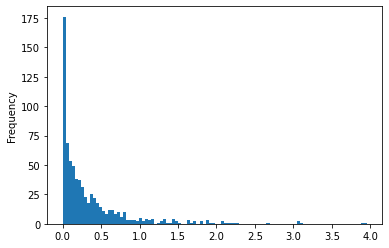

In [11]:
compliance_comparison['DELTA'].plot.hist(bins=100)

In [12]:
a = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 0)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 0)
    ].shape[0]
b = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 1)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 1)
    ].shape[0]
c = compliance_comparison[compliance_comparison.DELTA == 0].shape[0]

print(f'{b} full-time compliers represent {np.round(b/c, 2)} out of {c} consistent (0 delta) movie theaters')
print(f'{a} full-time non-compliers represent {np.round(a/c, 2)} out of {c} consistent (0 delta) movie theaters')

43 full-time compliers represent 0.96 out of 45 consistent (0 delta) movie theaters
1 full-time non-compliers represent 0.02 out of 45 consistent (0 delta) movie theaters


In [17]:
# checking for how many obs will be spread across diff bins

bounds = {}

# bounds to be used later
bounds['b1'] = [-0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 50]
bounds['b2'] = [-0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50]
bounds['b3'] = [-0.1, 0.4, 0.8, 1.2, 1.6, 50]
bounds['b4'] = [-0.1, 0.45, 0.85, 1.25, 1.65, 50]
bounds['b5'] = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]
bounds['b6'] = [-0.1, 0.85, 0.95, 1.05, 1.15, 50]

alpha = 'ABCDEFGHIJKLMNOPQRSTUVXZ'

for i in range(1,7):
    compliance_comparison[f'2017_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])
    compliance_comparison[f'2018_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])

In [22]:
b = tds_1718.shape[0]

for i in range(1,7):
    mts = np.where(compliance_comparison[f'2017_B{i}'] != compliance_comparison[f'2018_B{i}'], 1, 0).sum()
    mtt = compliance_comparison.shape[0]
    a = 2*(mtt - mts)
    print(f'For bounds B{i}, {mts} movie theaters will be shifted between bounds out of {mtt} movie theaters, meaning\
 {a} out of {b} observations (or {np.round(a/b,2)}) will have FE')

For bounds B1, 381 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 680 out of 1525 observations (or 0.45) will have FE
For bounds B2, 438 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 566 out of 1525 observations (or 0.37) will have FE
For bounds B3, 326 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 790 out of 1525 observations (or 0.52) will have FE
For bounds B4, 321 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 800 out of 1525 observations (or 0.52) will have FE
For bounds B5, 542 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 358 out of 1525 observations (or 0.23) will have FE
For bounds B6, 375 movie theaters will be shifted between bounds out of 721 movie theaters, meaning 692 out of 1525 observations (or 0.45) will have FE


### Dependent variable: income

In [199]:
seg_regs = {} # creating dict to store regression objects

count_regs = 0 # counter to automatically generate reg numbers

#### Bounds - [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

In [200]:
bounds = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

18


In [201]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 0, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 1, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0278    0.067  0.413  0.697
DIAS_FUNCIONAMENTO        0.0067    0.005  1.334  0.240


Reg_seg 2, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.3731    0.086 -4.361  0.143
DIAS_FUNCIONAMENTO        0.0168    0.004  4.126  0.151


Reg_seg 3, ALL: lower bound 0.3, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0055    0.003  1.761  0.089
DIAS_FUNCIONAMENTO        0.0045    0.000  9.917  0.000


Reg_seg 4, FOREIGN: lower bound 0.3, higher bound 0.6
                            coef  std err       t  P>|t|
OBRIG

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 15, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 16, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0360    0.053  0.681  0.526
DIAS_FUNCIONAMENTO        0.0185    0.013  1.414  0.216


Reg_seg 17, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0103    0.011 -0.941  0.383
DIAS_FUNCIONAMENTO        0.0122    0.003  4.628  0.004




#### Bounds - [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

In [202]:
bounds = [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

42


In [203]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 18, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0304    0.066  0.462  0.663
DIAS_FUNCIONAMENTO        0.0065    0.005  1.338  0.238


Reg_seg 19, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0278    0.067  0.413  0.697
DIAS_FUNCIONAMENTO        0.0067    0.005  1.334  0.240


Reg_seg 20, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.3731    0.086 -4.361  0.143
DIAS_FUNCIONAMENTO        0.0168    0.004  4.126  0.151


Reg_seg 21, ALL: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0065    0.005  1.369  0.220
DIAS_FUNCIONAMENTO        0.0040    0.001  6.681  0.001


Reg_seg 22, FOREIGN: lower bound 0.3, higher bound 0.5
                            coef  std err      t  P>|t|
O

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1091      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0014      inf  0    NaN


Reg_seg 38, BRAZILIAN: lower bound 1.3, higher bound 1.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1271      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0076      inf  0    NaN


Reg_seg 39, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 40, FOREIGN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0360    0.053  0.681  0.526
DIAS_FUNCIONAMENTO        0.0185    0.013  1.414  0.216


Reg_seg 41, BRAZILIAN: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0103    0.011 -0.941  0.383
DIAS_FUNCIONAME

#### Bounds - [0, 0.4, 0.8, 1.2, 1.6, 50]

In [204]:
bounds = [0, 0.4, 0.8, 1.2, 1.6, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

57


In [205]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 42, ALL: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0210    0.031  0.677  0.510
DIAS_FUNCIONAMENTO        0.0056    0.003  2.207  0.044


Reg_seg 43, FOREIGN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0225    0.032  0.697  0.497
DIAS_FUNCIONAMENTO        0.0055    0.003  2.082  0.056


Reg_seg 44, BRAZILIAN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.1362    0.075 -1.805  0.109
DIAS_FUNCIONAMENTO        0.0134    0.006  2.302  0.050


Reg_seg 45, ALL: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0078    0.002   3.166  0.002
DIAS_FUNCIONAMENTO        0.0048    0.000  11.272  0.000


Reg_seg 46, FOREIGN: lower bound 0.4, higher bound 0.8
                            coef  std err       t  P>|

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0053    0.011 -0.500  0.635
DIAS_FUNCIONAMENTO        0.0138    0.003  5.407  0.002


Reg_seg 55, FOREIGN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0360    0.053  0.681  0.526
DIAS_FUNCIONAMENTO        0.0185    0.013  1.414  0.216


Reg_seg 56, BRAZILIAN: lower bound 1.6, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0103    0.011 -0.941  0.383
DIAS_FUNCIONAMENTO        0.0122    0.003  4.628  0.004




#### Bounds - [0, 0.45, 0.85, 1.25, 1.65, 50]

In [206]:
bounds = [0, 0.45, 0.85, 1.25, 1.65, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

72


In [207]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 57, ALL: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0194    0.017  1.158   0.26
DIAS_FUNCIONAMENTO        0.0059    0.001  4.153   0.00


Reg_seg 58, FOREIGN: lower bound 0, higher bound 0.45
                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.019    0.017  1.087  0.289
DIAS_FUNCIONAMENTO        0.006    0.001  4.016  0.001


Reg_seg 59, BRAZILIAN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0333    0.045 -0.747  0.467
DIAS_FUNCIONAMENTO        0.0067    0.004  1.850  0.084


Reg_seg 60, ALL: lower bound 0.45, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0061    0.003  2.163  0.034
DIAS_FUNCIONAMENTO        0.0048    0.001  9.524  0.000


Reg_seg 61, FOREIGN: lower bound 0.45, higher bound 0.85
                            coef  std err      t  P>|

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self



Reg_seg 70, FOREIGN: lower bound 1.65, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0360    0.053  0.681  0.526
DIAS_FUNCIONAMENTO        0.0185    0.013  1.414  0.216


Reg_seg 71, BRAZILIAN: lower bound 1.65, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0103    0.011 -0.941  0.383
DIAS_FUNCIONAMENTO        0.0122    0.003  4.628  0.004




#### Bounds - [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]

In [208]:
bounds = [x/10 for x in range(14)]
bounds.append(50)

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

114


In [209]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 72, ALL: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0566      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0165      inf  0    NaN


Reg_seg 73, FOREIGN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0690      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0175      inf  0    NaN


Reg_seg 74, BRAZILIAN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0239      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0077      inf  0    NaN


Reg_seg 75, ALL: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1550      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0111      inf  0    NaN


Reg_seg 76, FOREIGN: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1546      inf  0   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 79, FOREIGN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0406      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0094      inf  0    NaN


Reg_seg 80, BRAZILIAN: lower bound 0.2, higher bound 0.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0569      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0049      inf  0    NaN


Reg_seg 81, ALL: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0479      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0002      inf  0    NaN


Reg_seg 82, FOREIGN: lower bound 0.3, higher bound 0.4
                              coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.051500      inf  0    NaN
DIAS_FUNCIONAMENTO        0.000008      inf  0    NaN


Reg_seg 83, BRAZILIAN: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0040

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0004    0.001  0.276  0.809
DIAS_FUNCIONAMENTO        0.0033    0.001  3.919  0.059


Reg_seg 85, FOREIGN: lower bound 0.4, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0025    0.001 -4.039  0.056
DIAS_FUNCIONAMENTO        0.0030    0.000  7.629  0.017


Reg_seg 86, BRAZILIAN: lower bound 0.4, higher bound 0.5
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0241    0.033  0.735  0.539
DIAS_FUNCIONAMENTO        0.0046    0.021  0.221  0.846


Reg_seg 87, ALL: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0121    0.006  1.939  0.110
DIAS_FUNCIONAMENTO        0.0051    0.001  7.140  0.001


Reg_seg 88, FOREIGN: lower bound 0.5, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0110    0.007  1.6

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0005    0.001  -0.381  0.704
DIAS_FUNCIONAMENTO        0.0050    0.000  10.686  0.000


Reg_seg 100, FOREIGN: lower bound 0.9, higher bound 1.0
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0018    0.001 -1.223  0.226
DIAS_FUNCIONAMENTO        0.0049    0.001  9.833  0.000


Reg_seg 101, BRAZILIAN: lower bound 0.9, higher bound 1.0
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0056    0.007  0.823  0.414
DIAS_FUNCIONAMENTO        0.0070    0.002  3.038  0.003


Reg_seg 102, ALL: lower bound 1.0, higher bound 1.1
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0005    0.001   0.438  0.662
DIAS_FUNCIONAMENTO        0.0050    0.000  21.183  0.000


Reg_seg 103, FOREIGN: lower bound 1.0, higher bound 1.1
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0012   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self



Reg_seg 111, ALL: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0055    0.010 -0.559  0.593
DIAS_FUNCIONAMENTO        0.0139    0.002  5.889  0.001


Reg_seg 112, FOREIGN: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0355    0.049  0.727  0.495
DIAS_FUNCIONAMENTO        0.0193    0.012  1.626  0.155


Reg_seg 113, BRAZILIAN: lower bound 1.3, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0107    0.010 -1.050  0.329
DIAS_FUNCIONAMENTO        0.0123    0.002  5.007  0.002




#### Bounds - [0, 0.85, 0.95, 1.05, 1.15, 50]

In [210]:
bounds = [0, 0.85, 0.95, 1.05, 1.15, 50]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

129


In [211]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 114, ALL: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0037    0.002   1.755  0.081
DIAS_FUNCIONAMENTO        0.0064    0.000  17.074  0.000


Reg_seg 115, FOREIGN: lower bound 0, higher bound 0.85
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0038    0.002   1.889  0.061
DIAS_FUNCIONAMENTO        0.0065    0.000  18.179  0.000


Reg_seg 116, BRAZILIAN: lower bound 0, higher bound 0.85
                            coef  std err     t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0050    0.005 -0.98  0.329
DIAS_FUNCIONAMENTO        0.0048    0.001  4.35  0.000


Reg_seg 117, ALL: lower bound 0.85, higher bound 0.95
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0952    0.081  1.178  0.448
DIAS_FUNCIONAMENTO        0.0195    0.009  2.097  0.283


Reg_seg 118, FOREIGN: lower bound 0.85, higher bound 0.95
                            coef  std err 

#### Bounds - [0.99, 1.01]

In [212]:
bounds = [0.99, 1.01]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = tds_1718[tds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = est_1718[est_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_regs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = bras_1718[bras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

132


In [213]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_regs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 129, ALL: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0011    0.002  0.734  0.466
DIAS_FUNCIONAMENTO        0.0012    0.002  0.691  0.492


Reg_seg 130, FOREIGN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0016    0.002 -0.935  0.353
DIAS_FUNCIONAMENTO        0.0031    0.002  1.619  0.110


Reg_seg 131, BRAZILIAN: lower bound 0.99, higher bound 1.01
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0216    0.006  3.708  0.000
DIAS_FUNCIONAMENTO       -0.0202    0.007 -3.029  0.004




## Alternative regressions

### Dependent variable: number of opening days

In [219]:
complex_days = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [220]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=tds_1719).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=est_1719).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=bras_1719).fit()
    d_count += 1

In [221]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_days[f'reg_cd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_days 0, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.3288    0.772 -0.426  0.670
CUMP_QUADRATIC                           37.0108   29.696  1.246  0.213
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.5683    0.823  0.690  0.490


Reg_complex_days 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.3388    0.779 -0.435  0.664
CUMP_QUADRATIC                           36.1906   30.076  1.203  0.229
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.5846    0.830  0.705  0.481


Reg_complex_days 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -1.6298    0.731 -2.230  0.026
CUMP_QUADRATIC                          -46.9744   28.876 -1.627  0.104
OBRIGAÇÃO_TOTA

#### 2017-2018

In [222]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=tds_1718).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=est_1718).fit()
    d_count += 1
    complex_days[f'reg_cd{d_count}'] = smf.ols(formula = formul, data=bras_1718).fit()
    d_count += 1

In [223]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_days[f'reg_cd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_days 12, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1607    2.455  0.065  0.948
CUMP_QUADRATIC                           48.1702   41.535  1.160  0.247
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3867    1.157  0.334  0.738


Reg_complex_days 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1570    2.455  0.064  0.949
CUMP_QUADRATIC                           48.0319   41.526  1.157  0.248
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   0.3891    1.157  0.336  0.737


Reg_complex_days 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -0.2880    2.244 -0.128  0.898
CUMP_QUADRATIC                          -40.8075   40.695 -1.003  0.316
OBRIGAÇÃO_T

### Dependent variable: number of sessions

In [224]:
complex_sessions = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [225]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'QTDE_SESSOES ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=tds_1719).fit()
    d_count += 1
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=est_1719).fit()
    d_count += 1
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=bras_1719).fit()
    d_count += 1

In [226]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_sessions {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_sessions[f'reg_cs{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_sessions 0, ALL, weighting function CUMP_QUADRATIC:
                                              coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  -43.6831   12.770 -3.421  0.001
CUMP_QUADRATIC                          -1440.8506  491.116 -2.934  0.003
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC    54.0346   13.616  3.968  0.000


Reg_complex_sessions 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -27.5502   11.150 -2.471  0.014
CUMP_QUADRATIC                          -702.8966  430.466 -1.633  0.103
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   29.8130   11.876  2.510  0.012


Reg_complex_sessions 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 -16.8138    2.817 -5.969    0.0
CUMP_QUADRATIC                          -771.2451  111.282 -

#### 2017-2018

In [227]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'QTDE_SESSOES ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=tds_1718).fit()
    d_count += 1
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=est_1718).fit()
    d_count += 1
    complex_sessions[f'reg_cs{d_count}'] = smf.ols(formula = formul, data=bras_1718).fit()
    d_count += 1

In [228]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_complex_sessions {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(complex_sessions[f'reg_cs{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_complex_sessions 12, ALL, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  20.6551   33.495  0.617  0.538
CUMP_QUADRATIC                          -815.0256  566.599 -1.438  0.151
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   34.3751   15.785  2.178  0.030


Reg_complex_sessions 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  22.4802   29.058  0.774  0.439
CUMP_QUADRATIC                          -302.0462  491.547 -0.614  0.539
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   17.0369   13.694  1.244  0.214


Reg_complex_sessions 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  -2.3377    7.825 -0.299  0.765
CUMP_QUADRATIC                          -575.2498  141.900 -4

### Regressions only with 0 transfer multiplexes

In [83]:
l_tds = [] # storing multiplexes that appear at least two times in data
l_est = [] # same for foreign
l_bras = [] # same for br

list_of_lists = [l_tds,l_est,l_bras]
data = [tds_1719,est_1719,bras_1719]

for l in list_of_lists:
    for c in data[list_of_lists.index(l)].REGISTRO_COMPLEXO.unique():
        if tds_1719.loc[(tds_1719.REGISTRO_COMPLEXO == c) & (tds_1719.TRANSF_FLAG == 0)].shape[0] > 1:
            l.append(c)

In [86]:
filt_tds_1719 = tds_1719[tds_1719.REGISTRO_COMPLEXO.apply(lambda x: True if (x in l_tds) else False)]
filt_est_1719 = est_1719[est_1719.REGISTRO_COMPLEXO.apply(lambda x: True if (x in l_est) else False)]
filt_bras_1719 = bras_1719[bras_1719.REGISTRO_COMPLEXO.apply(lambda x: True if (x in l_bras) else False)]

In [96]:
filt_tds_1718 = filt_tds_1719[filt_tds_1719.ANO_CINEMATOGRAFICO != 2019]
filt_est_1718 = filt_est_1719[filt_est_1719.ANO_CINEMATOGRAFICO != 2019]
filt_bras_1718 = filt_bras_1719[filt_bras_1719.ANO_CINEMATOGRAFICO != 2019]

In [92]:
no_transfers = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [93]:
last_d_count = d_count # to get num range of regressions to be executed

dvar = 'np.log(RENDA)'

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'{dvar} ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_tds_1719).fit()
    d_count += 1
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_est_1719).fit()
    d_count += 1
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_bras_1719).fit()
    d_count += 1

In [95]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_filter_multiplex {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(no_transfers[f'reg_filt{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_filter_multiplex 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0027    0.005   0.596  0.551
CUMP_QUADRATIC                           0.3748    0.178   2.107  0.035
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0051    0.005  -1.020  0.308
DIAS_FUNCIONAMENTO                       0.0066    0.000  40.306  0.000


Reg_filter_multiplex 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0020    0.005   0.425  0.671
CUMP_QUADRATIC                           0.2713    0.190   1.427  0.154
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0038    0.005  -0.720  0.472
DIAS_FUNCIONAMENTO                       0.0067    0.000  38.515  0.000


Reg_filter_multiplex 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
OB

#### 2017-2018

In [97]:
last_d_count = d_count # to get num range of regressions to be executed

dvar = 'np.log(RENDA)'

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'{dvar} ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_COMPLEXO) + C(ANO_CINEMATOGRAFICO)'
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_tds_1718).fit()
    d_count += 1
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_est_1718).fit()
    d_count += 1
    no_transfers[f'reg_filt{d_count}'] = smf.ols(formula = formul, data=filt_bras_1718).fit()
    d_count += 1

In [98]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_filter_multiplex {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(no_transfers[f'reg_filt{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_filter_multiplex 12, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0128    0.016   0.781  0.435
CUMP_QUADRATIC                           0.6306    0.268   2.351  0.019
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0138    0.007  -1.846  0.065
DIAS_FUNCIONAMENTO                       0.0067    0.000  26.683  0.000


Reg_filter_multiplex 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0122    0.016   0.739  0.460
CUMP_QUADRATIC                           0.6783    0.269   2.521  0.012
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0161    0.008  -2.150  0.032
DIAS_FUNCIONAMENTO                       0.0069    0.000  27.322  0.000


Reg_filter_multiplex 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|


# Chain/year regressions

## Import and adjust

In [61]:
# import
gtds_1719 = pd.read_csv('SCB_Grupo x Ano - 2017 a 2019 - mesclado fiscalização.csv')
gest_1719 = pd.read_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv')
gbras_1719 = pd.read_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv')

In [47]:
gtds_1719.REGISTRO_GRUPO.nunique()

240

In [48]:
gtds_1719.columns

Index(['ANO_CINEMATOGRAFICO', 'G_QTDE_TIT_DIF_EXIB', 'G_QTDE_DIF_TIT_EXIB_BR',
       'G_QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA', 'QTDE_SESSOES',
       'DIAS_FUNCIONAMENTO_GRUPO', 'REG_EMPRESA', 'REGISTRO_COMPLEXO',
       'REGISTRO_SALA', 'SALAS_GRUPO_INFERIDO', 'ASSENTOS_GRUPO_INFERIDO',
       'CAPACIDADE_TOTAL_GRUPO', 'OCUPAÇÃO_MÉDIA', 'OBRIGAÇÃO_TOTAL_POR_SALA',
       'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_PROP_POR_SALA',
       'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA', 'OBRIGAÇÃO_FINAL_POR_SALA',
       'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS', 'CUMPRIMENTO_PROP_TRUNCADO',
       'CUMPRIMENTO_PROPORCIONAL', 'CUMPRIMENTO_LINEAR',
       'CUMPRIMENTO_TRIWEIGHT', 'CUMPRIMENTO_NORMALIZADO',
       'DIAS_FUNCIONAMENTO', 'QTDE_DIF_TIT_EXIB', 'QTDE_DIF_TIT_EXIB_BR',
       'QTDE_DIF_TIT_EXIB_EST', 'REGISTRO_GRUPO'],
      dtype='object')

In [62]:
gtds_1719.columns = ['ANO_CINEMATOGRAFICO', 'G_QTDE_TIT_DIF_EXIB', 'G_QTDE_DIF_TIT_EXIB_BR',
       'G_QTDE_DIF_TIT_EXIB_EST', 'PUBLICO', 'RENDA', 'QTDE_SESSOES',
       'DIAS_FUNCIONAMENTO', 'QTDE_EMPRESA', 'QTDE_COMPLEXO',
       'QTDE_SALAS', 'SALAS_GRUPO_INFERIDO', 'ASSENTOS_GRUPO_INFERIDO','CAPACIDADE_TOTAL_GRUPO',
       'OCUPAÇÃO_MÉDIA','OBRIGAÇÃO_TOTAL_POR_SALA', 'OBRIGAÇÃO_TOTAL_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_PROP_POR_SALA', 'OBRIGAÇÃO_PROP_INCREMENTO_POR_SALA',
       'OBRIGAÇÃO_FINAL_POR_SALA', 'TRANSF_ORIGEM', 'TRANSF_RECEBIDOS',
       'CUMP_QUADRATIC', 'CUMP_PROPORCIONAL',
       'CUMP_LINEAR', 'CUMP_TRIWEIGHT',
       'CUMP_NORMALIZADO', 'DIAS_FUNCIONAMENTO_GRUPO', 'TIT_TOTAL',
       'TIT_BR', 'TIT_EST', 'REGISTRO_GRUPO']

gest_1719.columns = gtds_1719.columns
gbras_1719.columns = gtds_1719.columns

In [63]:
# getting panels without 2019
gtds_1718 = gtds_1719[gtds_1719.ANO_CINEMATOGRAFICO != 2019]
gest_1718 = gest_1719[gest_1719.ANO_CINEMATOGRAFICO != 2019]
gbras_1718 = gbras_1719[gbras_1719.ANO_CINEMATOGRAFICO != 2019]

In [333]:
# export for R
gtds_1719.to_csv('SCB_Grupo x Ano - 2017 a 2019 - mesclado fiscalização.csv',index=False)
gest_1719.to_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2019 - mesclado fiscalização.csv',index=False)
gbras_1719.to_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2019 - mesclado fiscalização.csv',index=False)

gtds_1718.to_csv('SCB_Grupo x Ano - 2017 a 2018 - mesclado fiscalização.csv',index=False)
gest_1718.to_csv('SCB_Grupo x Ano (receita estrangeiros) - 2017 a 2018 - mesclado fiscalização.csv',index=False)
gbras_1718.to_csv('SCB_Grupo x Ano (receita brasileiros) - 2017 a 2018 - mesclado fiscalização.csv',index=False)

## Naïve regressions

Define movie-theater chain $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

In [25]:
group_naive = {}

g_count = 0

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [26]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [29]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('No. of Observations:')
    print(group_naive[f'reg_gn{i}'].nobs)
    print('R-squared:')
    print(group_naive[f'reg_gn{i}'].rsquared)
    print('Adj r_squared')
    print(group_naive[f'reg_gn{i}'].rsquared_adj)
    print('\n')

Reg_group 0, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0064    0.005  1.332  0.184
DIAS_FUNCIONAMENTO        0.0212    0.032  0.663  0.508
No. of Observations:
628.0
R-squared:
0.95985818965564
Adj r_squared
0.9344559502970996


Reg_group 1, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0078    0.005  1.595  0.112
DIAS_FUNCIONAMENTO        0.0207    0.032  0.645  0.519
No. of Observations:
624.0
R-squared:
0.9613649291903578
Adj r_squared
0.9368250679411887


Reg_group 2, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0065    0.006  1.012  0.312
DIAS_FUNCIONAMENTO        0.0074    0.042  0.175  0.861
No. of Observations:
602.0
R-squared:
0.930140482182674
Adj r_squared
0.8855979013400193




##### 2017-2018

In [13]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [14]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 3, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0343    0.046 -0.739  0.461
DIAS_FUNCIONAMENTO        0.0233    0.069  0.335  0.738


Reg_group 4, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0350    0.047 -0.739  0.461
DIAS_FUNCIONAMENTO        0.0213    0.071  0.302  0.763


Reg_group 5, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0491    0.065  0.754  0.452
DIAS_FUNCIONAMENTO       -0.0004    0.094 -0.004  0.997




#### Without entity fixed-effects

##### 2017-2019

In [15]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [16]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 6, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1024  0.006000  17.472    0.0
DIAS_FUNCIONAMENTO        0.1908  0.025000   7.572    0.0
SALAS_GRUPO_INFERIDO      0.0640  0.015000   4.133    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000064  -5.399    0.0


Reg_group 7, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1043  0.006000  16.856    0.0
DIAS_FUNCIONAMENTO        0.1907  0.026000   7.214    0.0
SALAS_GRUPO_INFERIDO      0.0632  0.016000   3.890    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000067  -5.092    0.0


Reg_group 8, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1022  0.006000  16.759    0.0
DIAS_FUNCIONAMENTO        0.1960  0.024000   7.999    0.0
SALAS_GRUPO_INFERIDO      0.0745  0.015000   4.944    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0004  0.000062  -6.343    0.0




##### 2017-2018

In [17]:
formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [18]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 9, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1083  0.005000  19.771  0.000
DIAS_FUNCIONAMENTO        0.2077  0.028000   7.444  0.000
SALAS_GRUPO_INFERIDO      0.0346  0.018000   1.907  0.057
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000075  -3.115  0.002


Reg_group 10, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1102  0.006000  18.506  0.000
DIAS_FUNCIONAMENTO        0.2091  0.030000   6.931  0.000
SALAS_GRUPO_INFERIDO      0.0334  0.020000   1.706  0.089
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000081  -2.828  0.005


Reg_group 11, BRAZILIAN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1082  0.006000  18.949  0.000
DIAS_FUNCIONAMENTO        0.2171  0.027000   7.996  0.000
SALAS_GRUPO_INFERIDO      0.0453  0.018000   2.562  0.011
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000073  -3.909  0.000




### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [19]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [20]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 12, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0074    0.005  1.592  0.112
DIAS_FUNCIONAMENTO        0.0255    0.031  0.824  0.410


Reg_group 13, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0084    0.005  1.782  0.076
DIAS_FUNCIONAMENTO        0.0242    0.031  0.774  0.440


Reg_group 14, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0088    0.006  1.443  0.150
DIAS_FUNCIONAMENTO        0.0139    0.040  0.344  0.731




##### 2017-2018

In [21]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [22]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 15, ALL:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0384    0.044 -0.864  0.388
DIAS_FUNCIONAMENTO        0.0257    0.066  0.387  0.699


Reg_group 16, FOREIGN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA -0.0392    0.046 -0.858  0.392
DIAS_FUNCIONAMENTO        0.0207    0.068  0.303  0.762


Reg_group 17, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.0478    0.061  0.786  0.433
DIAS_FUNCIONAMENTO        0.0088    0.087  0.101  0.920




#### Without entity fixed-effects

##### 2017-2019

In [23]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
g_count += 1

In [24]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 18, ALL:
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0978  0.00500  17.881    0.0
DIAS_FUNCIONAMENTO        0.2016  0.02300   8.578    0.0
SALAS_GRUPO_INFERIDO      0.0552  0.01400   3.818    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.00006  -5.300    0.0


Reg_group 19, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0998  0.006000  17.220    0.0
DIAS_FUNCIONAMENTO        0.2019  0.025000   8.158    0.0
SALAS_GRUPO_INFERIDO      0.0541  0.015000   3.554    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.000063  -4.962    0.0


Reg_group 20, BRAZILIAN:
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0980  0.00600  16.625    0.0
DIAS_FUNCIONAMENTO        0.2060  0.02400   8.698    0.0
SALAS_GRUPO_INFERIDO      0.0659  0.01500   4.520    0.0
ASSENTOS_GRUPO_INFERIDO  -0.0004  0.00006  -6.068    0.0




##### 2017-2018

In [25]:
formul = 'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
g_count += 1

group_naive[f'reg_gn{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
g_count += 1

In [26]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 21, ALL:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1033  0.005000  20.462  0.000
DIAS_FUNCIONAMENTO        0.2112  0.026000   8.207  0.000
SALAS_GRUPO_INFERIDO      0.0298  0.017000   1.779  0.076
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000069  -3.149  0.002


Reg_group 22, FOREIGN:
                            coef   std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1054  0.006000  19.048  0.000
DIAS_FUNCIONAMENTO        0.2129  0.028000   7.598  0.000
SALAS_GRUPO_INFERIDO      0.0281  0.018000   1.544  0.123
ASSENTOS_GRUPO_INFERIDO  -0.0002  0.000076  -2.810  0.005


Reg_group 23, BRAZILIAN:
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1036  0.00500  18.844  0.000
DIAS_FUNCIONAMENTO        0.2195  0.02600   8.396  0.000
SALAS_GRUPO_INFERIDO      0.0409  0.01700   2.402  0.017
ASSENTOS_GRUPO_INFERIDO  -0.0003  0.00007  -3.838  0.000




### Dependent variable: different titles

#### With entity fixed-effects

##### 2017-2019

In [28]:
f1 = 'TIT_TOTAL '
f2 = 'TIT_EST '
f3 = 'TIT_BR '

suffix = '~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

for form in [f1,f2,f3]:
    group_naive[f'reg_gn{g_count}'] = smf.ols(formula = form+suffix, data=gtds_1719).fit()
    g_count += 1

In [29]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 24, ALL:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA   0.4211    0.404   1.042  0.298
DIAS_FUNCIONAMENTO        30.9966    2.680  11.568  0.000


Reg_group 25, FOREIGN:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA   0.0749    0.407   0.184  0.854
DIAS_FUNCIONAMENTO        27.5413    2.700  10.200  0.000


Reg_group 26, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  0.3463    0.218  1.592  0.112
DIAS_FUNCIONAMENTO        3.4553    1.443  2.394  0.017




##### 2017-2018

In [33]:
g_count = 27

last_g_count = g_count

for form in [f1,f2,f3]:
    group_naive[f'reg_gn{g_count}'] = smf.ols(formula = form+suffix, data=gtds_1718).fit()
    g_count += 1

In [34]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_group 27, ALL:
                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA   0.8136    2.820  0.289  0.773
DIAS_FUNCIONAMENTO        40.3858    4.213  9.585  0.000


Reg_group 28, FOREIGN:
                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  -0.9871    3.475 -0.284  0.777
DIAS_FUNCIONAMENTO        37.7971    5.191  7.281  0.000


Reg_group 29, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA  1.8007    1.851  0.973  0.332
DIAS_FUNCIONAMENTO        2.5887    2.766  0.936  0.351




#### Without entity fixed-effects

##### 2017-2019

In [35]:
suffix = '~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

for form in [f1,f2,f3]:
    group_naive[f'reg_gn{g_count}'] = smf.ols(formula = form+suffix, data=gtds_1719).fit()
    g_count += 1

In [36]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 30, ALL:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA   2.1893    0.460   4.755  0.000
DIAS_FUNCIONAMENTO        23.3869    1.979  11.820  0.000
SALAS_GRUPO_INFERIDO      17.3918    1.216  14.299  0.000
ASSENTOS_GRUPO_INFERIDO   -0.0144    0.005  -2.872  0.004


Reg_group 31, FOREIGN:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA   1.9071    0.313   6.101    0.0
DIAS_FUNCIONAMENTO        20.2199    1.343  15.055    0.0
SALAS_GRUPO_INFERIDO      14.2278    0.826  17.232    0.0
ASSENTOS_GRUPO_INFERIDO   -0.0143    0.003  -4.185    0.0


Reg_group 32, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2822    0.209  1.348  0.178
DIAS_FUNCIONAMENTO        3.1671    0.900  3.520  0.000
SALAS_GRUPO_INFERIDO      3.1639    0.553  5.720  0.000
ASSENTOS_GRUPO_INFERIDO  -0.0002    0.002 -0.070  0.944




##### 2017-2018

In [39]:
last_g_count = g_count

for form in [f1,f2,f3]:
    group_naive[f'reg_gn{g_count}'] = smf.ols(formula = form+suffix, data=gtds_1718).fit()
    g_count += 1

In [40]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group {i}, {works[i%3]}:')
    print(pd.read_html(group_naive[f'reg_gn{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group 36, ALL:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA   1.5705    0.474   3.310  0.001
DIAS_FUNCIONAMENTO        28.1640    2.418  11.648  0.000
SALAS_GRUPO_INFERIDO      19.9717    1.571  12.710  0.000
ASSENTOS_GRUPO_INFERIDO   -0.0283    0.007  -4.351  0.000


Reg_group 37, FOREIGN:
                             coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA   1.5408    0.307   5.016    0.0
DIAS_FUNCIONAMENTO        24.0622    1.565  15.371    0.0
SALAS_GRUPO_INFERIDO      14.8561    1.017  14.603    0.0
ASSENTOS_GRUPO_INFERIDO   -0.0189    0.004  -4.491    0.0


Reg_group 38, BRAZILIAN:
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0297    0.224  0.132  0.895
DIAS_FUNCIONAMENTO        4.1018    1.144  3.586  0.000
SALAS_GRUPO_INFERIDO      5.1156    0.743  6.881  0.000
ASSENTOS_GRUPO_INFERIDO  -0.0094    0.003 -3.052  0.002




## Weighted regressions

Define movie-theater chain $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions), futher define nominal screen quota obligation $SQ$ and compliance level (quota fulfilled / quota due) as $C_{it}$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \beta_2 C_{it} + \beta_3 SQ_{it} * f(C_{it}) + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. $f(.)$ is the chosen weighting function (kernel). Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater chain as controls.

In [6]:
group_weighted = {}

g_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

### Dependent variable: income

#### With entity fixed-effects

##### 2017-2019

In [7]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [8]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0553    0.008  7.017  0.000
CUMP_QUADRATIC                           2.0501    0.291  7.044  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0541    0.009 -5.786  0.000
DIAS_FUNCIONAMENTO                       0.0348    0.029  1.188  0.235


Reg_group_weighted 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0609    0.008  7.481  0.000
CUMP_QUADRATIC                           2.0906    0.299  6.991  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0585    0.010 -6.083  0.000
DIAS_FUNCIONAMENTO                       0.0343    0.029  1.166  0.244


Reg_group_weighted 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR

##### 2017-2018

In [9]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [10]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 12, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0705    0.010  7.365  0.000
CUMP_QUADRATIC                           2.5331    0.445  5.689  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0692    0.015 -4.732  0.000
DIAS_FUNCIONAMENTO                       0.0532    0.062  0.853  0.395


Reg_group_weighted 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0770    0.010  7.629  0.000
CUMP_QUADRATIC                           2.5937    0.459  5.655  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0755    0.015 -5.002  0.000
DIAS_FUNCIONAMENTO                       0.0539    0.064  0.845  0.399


Reg_group_weighted 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

#### Without entity fixed-effects

##### 2017-2019

In [38]:
g_count = 24

last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [39]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 24, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0655  0.015000  4.241  0.000
CUMP_QUADRATIC                           0.8834  0.555000  1.592  0.112
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0248  0.018000  1.365  0.173
DIAS_FUNCIONAMENTO                       0.1798  0.024000  7.358  0.000
SALAS_GRUPO_INFERIDO                     0.0634  0.015000  4.197  0.000
ASSENTOS_GRUPO_INFERIDO                 -0.0003  0.000062 -5.408  0.000


Reg_group_weighted 25, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0677  0.016000  4.105  0.000
CUMP_QUADRATIC                           1.0730  0.592000  1.811  0.071
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0230  0.019000  1.185  0.236
DIAS_FUNCIONAMENTO                       0.1788  0.026000  6.988  0.000
SALA

##### 2017-2018

In [40]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [41]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 36, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0622  0.013000  4.714  0.000
CUMP_QUADRATIC                           0.5320  0.480000  1.108  0.268
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0378  0.016000  2.391  0.017
DIAS_FUNCIONAMENTO                       0.1921  0.026000  7.381  0.000
SALAS_GRUPO_INFERIDO                     0.0289  0.017000  1.681  0.093
ASSENTOS_GRUPO_INFERIDO                 -0.0002  0.000071 -2.838  0.005


Reg_group_weighted 37, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0642  0.015000  4.417  0.000
CUMP_QUADRATIC                           0.7181  0.530000  1.356  0.176
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0360  0.017000  2.072  0.039
DIAS_FUNCIONAMENTO                       0.1919  0.028000  6.814  0.000
SALA

### Dependent variable: public (moviegoers)

#### With entity fixed-effects

##### 2017-2019

In [11]:
g_count = 48

last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [12]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 48, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0555    0.008  7.366  0.000
CUMP_QUADRATIC                           1.9880    0.278  7.142  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0519    0.009 -5.807  0.000
DIAS_FUNCIONAMENTO                       0.0416    0.028  1.487  0.138


Reg_group_weighted 49, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0615    0.008  7.874  0.000
CUMP_QUADRATIC                           2.0739    0.287  7.230  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0572    0.009 -6.205  0.000
DIAS_FUNCIONAMENTO                       0.0402    0.028  1.424  0.155


Reg_group_weighted 50, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

##### 2017-2018

In [13]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [14]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 60, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0714    0.009  8.046  0.000
CUMP_QUADRATIC                           2.3502    0.413  5.691  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0622    0.014 -4.584  0.000
DIAS_FUNCIONAMENTO                       0.0704    0.058  1.217  0.225


Reg_group_weighted 61, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0780    0.010  8.193  0.000
CUMP_QUADRATIC                           2.4398    0.433  5.638  0.000
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC -0.0691    0.014 -4.853  0.000
DIAS_FUNCIONAMENTO                       0.0672    0.060  1.115  0.266


Reg_group_weighted 62, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_

In [47]:
print(group_weighted['reg_gw0'].nobs ,group_weighted['reg_gw1'].nobs, group_weighted['reg_gw2'].nobs, group_weighted['reg_gw48'].nobs,group_weighted['reg_gw49'].nobs, group_weighted['reg_gw50'].nobs)

628.0 624.0 602.0 628.0 624.0 602.0


#### Without entity fixed-effects

##### 2017-2019

In [48]:
g_count = 72

last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    g_count += 1

In [49]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 72, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0635  0.014000  4.399  0.000
CUMP_QUADRATIC                           0.7861  0.518000  1.516  0.130
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0234  0.017000  1.378  0.169
DIAS_FUNCIONAMENTO                       0.1916  0.023000  8.394  0.000
SALAS_GRUPO_INFERIDO                     0.0545  0.014000  3.863  0.000
ASSENTOS_GRUPO_INFERIDO                 -0.0003  0.000058 -5.296  0.000


Reg_group_weighted 73, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0671  0.015000  4.349  0.000
CUMP_QUADRATIC                           1.0660  0.555000  1.922  0.055
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0193  0.018000  1.066  0.287
DIAS_FUNCIONAMENTO                       0.1905  0.024000  7.954  0.000
SALA

##### 2017-2018

In [50]:
last_g_count = g_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(PUBLICO) ~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    g_count += 1
    group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    g_count += 1

In [51]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 84, ALL, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0605  0.012000  4.968  0.000
CUMP_QUADRATIC                           0.4646  0.443000  1.048  0.295
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0354  0.015000  2.430  0.016
DIAS_FUNCIONAMENTO                       0.1971  0.024000  8.201  0.000
SALAS_GRUPO_INFERIDO                     0.0244  0.016000  1.535  0.125
ASSENTOS_GRUPO_INFERIDO                 -0.0002  0.000066 -2.864  0.004


Reg_group_weighted 85, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef   std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 0.0640  0.013000  4.744  0.000
CUMP_QUADRATIC                           0.7419  0.491000  1.510  0.132
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  0.0314  0.016000  1.949  0.052
DIAS_FUNCIONAMENTO                       0.1965  0.026000  7.519  0.000
SALA

### Dependent variable: different titles

#### With entity fixed-effects

##### 2017-2019

In [52]:
f1 = 'TIT_TOTAL '
f2 = 'TIT_EST '
f3 = 'TIT_BR '

g_count = 96

suffix = '~ OBRIGAÇÃO_TOTAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_g_count = g_count

for f in weight_funcs:
    for form in [f1,f2,f3]:
    # adjust formula as we run through the weighting funcs
        formul = form + f'~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
        g_count += 1

In [53]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 96, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  1.1892    0.725   1.641  0.102
CUMP_QUADRATIC                           19.8812   26.786   0.742  0.458
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  -0.6175    0.860  -0.718  0.473
DIAS_FUNCIONAMENTO                       31.6792    2.692  11.766  0.000


Reg_group_weighted 97, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  1.5013    0.730   2.057  0.040
CUMP_QUADRATIC                           26.5561   26.986   0.984  0.326
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  -1.1392    0.867  -1.314  0.190
DIAS_FUNCIONAMENTO                       28.2104    2.712  10.401  0.000


Reg_group_weighted 98, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>

##### 2017-2018

In [54]:
last_g_count = g_count

for f in weight_funcs:
    for form in [f1,f2,f3]:
    # adjust formula as we run through the weighting funcs
        formul = form + f'~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
        g_count += 1

In [55]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-4:,:-2])
    print('\n')

Reg_group_weighted 108, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  1.7160    0.674  2.546  0.012
CUMP_QUADRATIC                           15.4410   31.361  0.492  0.623
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  -0.6815    1.030 -0.662  0.509
DIAS_FUNCIONAMENTO                       42.9599    4.394  9.776  0.000


Reg_group_weighted 109, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  1.9900    0.829  2.400  0.017
CUMP_QUADRATIC                           -2.6834   38.584 -0.070  0.945
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC  -0.2983    1.267 -0.235  0.814
DIAS_FUNCIONAMENTO                       41.4557    5.406  7.668  0.000


Reg_group_weighted 110, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OB

#### Without entity fixed-effects

##### 2017-2019

In [68]:
last_g_count = g_count

for f in weight_funcs:
    for form in [f1,f2,f3]:
    # adjust formula as we run through the weighting funcs
        formul = form + f'~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
        group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
        g_count += 1

In [70]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 120, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 -0.4483    1.255  -0.357  0.721
CUMP_QUADRATIC                          -70.2470   45.039  -1.560  0.119
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC   3.1479    1.477   2.132  0.033
DIAS_FUNCIONAMENTO                       23.5029    1.983  11.852  0.000
SALAS_GRUPO_INFERIDO                     17.0420    1.226  13.900  0.000
ASSENTOS_GRUPO_INFERIDO                  -0.0130    0.005  -2.580  0.010


Reg_group_weighted 121, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  0.5431    0.853   0.637  0.525
CUMP_QUADRATIC                          -33.0673   30.624  -1.080  0.281
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC   1.5944    1.004   1.588  0.113
DIAS_FUNCIONAMENTO                       20.2578    1.348  15.0

##### 2017-2018

In [71]:
last_g_count = g_count

for f in weight_funcs:
    for form in [f1,f2,f3]:
    # adjust formula as we run through the weighting funcs
        formul = form + f'~ OBRIGAÇÃO_FINAL_POR_SALA*{f} + DIAS_FUNCIONAMENTO + SALAS_GRUPO_INFERIDO + ASSENTOS_GRUPO_INFERIDO + C(ANO_CINEMATOGRAFICO)'
        group_weighted[f'reg_gw{g_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
        g_count += 1

In [72]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_g_count, g_count):
    print(f'Reg_group_weighted {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_g_count)//3]}:')
    print(pd.read_html(group_weighted[f'reg_gw{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-6:,:-2])
    print('\n')

Reg_group_weighted 132, ALL, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                 -0.2581    1.234  -0.209  0.834
CUMP_QUADRATIC                          -50.2517   44.908  -1.119  0.264
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC   2.2395    1.477   1.516  0.130
DIAS_FUNCIONAMENTO                       28.2939    2.435  11.621  0.000
SALAS_GRUPO_INFERIDO                     19.4765    1.607  12.119  0.000
ASSENTOS_GRUPO_INFERIDO                  -0.0263    0.007  -3.966  0.000


Reg_group_weighted 133, FOREIGN, weighting function CUMP_QUADRATIC:
                                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA                  0.6167    0.800   0.771  0.441
CUMP_QUADRATIC                          -23.4281   29.110  -0.805  0.421
OBRIGAÇÃO_FINAL_POR_SALA:CUMP_QUADRATIC   1.1113    0.958   1.160  0.247
DIAS_FUNCIONAMENTO                       24.1072    1.578  15.2

## Segmented regressions

Define multiplex $i$ in year $t$ and title "nationality" (meaning all, foreign or Brazilian movie sessions) and nominal screen quota obligation $SQ$:

$$ \ln(Y_{nit}) = \beta_0 + \beta_1 SQ_{it} + \theta X_{it} + \varepsilon_{it} $$

$Y$ is the interest variable that can be either Yearly Income or total public (# of moviegoers). $X_{it}$ is a vector of controls with opening days, movie theater fixed-effects and year fixed-effects. Alternatively, we also drop entity fixed-effects and use number of viewing rooms and seats per movie-theater as controls.

Here, we segment regressions by complance level. Each regression comprises a bin of compliance. In addition, 2019 is excluded from all regressions.

### Preliminary: checking for correlation between compliance levels

*One problem of segmented regressions (by compliance level) is that a movie theater may shift bins from one year to another, as a result, only one observation for said movie theater will be available for each bin, making it impossible to use fixed-effects on that particular movie theater*

In [261]:
gtds_1718.shape[0]

408

In [262]:
# getting only movie theaters that appear in both years
dups = gtds_1718[gtds_1718.duplicated(subset=['REGISTRO_COMPLEXO'], keep=False)]

print(f'{gtds_1718.shape[0] - dups.shape[0]} observations, out of {gtds_1718.shape[0]}, appear in only one of two years and can\
 have no fixed-effects')

10 observations, out of 408, appear in only one of two years and can have no fixed-effects


In [263]:
# getting yearly compliance to compare both
d_17 = dups.query('ANO_CINEMATOGRAFICO == 2017')[['REGISTRO_GRUPO','CUMPRIMENTO_PROPORCIONAL']] 
d_17.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2017'}, axis=1, inplace=True)

d_18 = dups.query('ANO_CINEMATOGRAFICO == 2018')[['REGISTRO_GRUPO','CUMPRIMENTO_PROPORCIONAL']]
d_18.rename({'CUMPRIMENTO_PROPORCIONAL':'CUMPRIMENTO_PROPORCIONAL_2018'}, axis=1, inplace=True)

# merging both
compliance_comparison = pd.merge(d_17,d_18,on='REGISTRO_GRUPO')

In [264]:
compliance_comparison.corr()
# as one can see, correlation is 0.76 (higher than for complexes, which is only 0.55), but not particularly high

,CUMPRIMENTO_PROPORCIONAL_2017,CUMPRIMENTO_PROPORCIONAL_2018
CUMPRIMENTO_PROPORCIONAL_2017,1.000000,0.763376
CUMPRIMENTO_PROPORCIONAL_2018,0.763376,1.000000


In [265]:
# getting absolute delta for both
compliance_comparison['DELTA'] = np.where(
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] >= compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'],
    compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2018'] - compliance_comparison['CUMPRIMENTO_PROPORCIONAL_2017'])

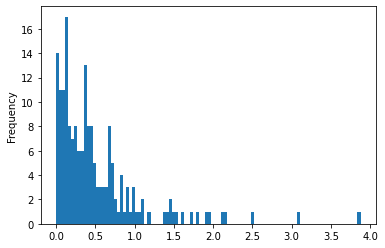

In [266]:
compliance_comparison['DELTA'].plot.hist(bins=100)

In [267]:
a = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 0)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 0)
    ].shape[0]
b = compliance_comparison[
    (compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017 == 1)&(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018 == 1)
    ].shape[0]
c = compliance_comparison[compliance_comparison.DELTA == 0].shape[0]

print(f'{b} full-time compliers represent {np.round(b/c, 2)} out of {c} consistent (0 delta) movie theaters')
print(f'{a} full-time non-compliers represent {np.round(a/c, 2)} out of {c} consistent (0 delta) movie theaters')

0 full-time compliers represent 0.0 out of 2 consistent (0 delta) movie theaters
1 full-time non-compliers represent 0.5 out of 2 consistent (0 delta) movie theaters


In [268]:
# checking for how many obs will be spread across diff bins

bounds = {}

# bounds to be used later
bounds['b1'] = [-0.1, 0.3, 0.6, 0.9, 1.2, 1.5, 50]
bounds['b2'] = [-0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50]
bounds['b3'] = [-0.1, 0.4, 0.8, 1.2, 1.6, 50]
bounds['b4'] = [-0.1, 0.45, 0.85, 1.25, 1.65, 50]
bounds['b5'] = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]
bounds['b6'] = [-0.1, 0.85, 0.95, 1.05, 1.15, 50]

alpha = 'ABCDEFGHIJKLMNOPQRSTUVXZ'

for i in range(1,7):
    compliance_comparison[f'2017_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2017, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])
    compliance_comparison[f'2018_B{i}'] = pd.cut(compliance_comparison.CUMPRIMENTO_PROPORCIONAL_2018, 
           bounds[f'b{i}'], labels=[alpha[i] for i in range(len(bounds[f'b{i}']) - 1)])

In [269]:
b = gtds_1718.shape[0]

for i in range(1,7):
    mts = np.where(compliance_comparison[f'2017_B{i}'] != compliance_comparison[f'2018_B{i}'], 1, 0).sum()
    mtt = compliance_comparison.shape[0]
    a = 2*(mtt - mts)
    print(f'For bounds B{i}, {mts} out of {mtt} movie theaters will be shifted between bounds , meaning\
 {a} out of {b} observations (or {np.round(a/b,2)}) will have FE \n')

For bounds B1, 124 out of 183 movie theaters will be shifted between bounds , meaning 118 out of 408 observations (or 0.29) will have FE 

For bounds B2, 138 out of 183 movie theaters will be shifted between bounds , meaning 90 out of 408 observations (or 0.22) will have FE 

For bounds B3, 109 out of 183 movie theaters will be shifted between bounds , meaning 148 out of 408 observations (or 0.36) will have FE 

For bounds B4, 112 out of 183 movie theaters will be shifted between bounds , meaning 142 out of 408 observations (or 0.35) will have FE 

For bounds B5, 156 out of 183 movie theaters will be shifted between bounds , meaning 54 out of 408 observations (or 0.13) will have FE 

For bounds B6, 100 out of 183 movie theaters will be shifted between bounds , meaning 166 out of 408 observations (or 0.41) will have FE 



### Dependent variable: income

In [335]:
seg_gregs = {} # creating dict to store regression objects

count_regs = 0 # counter to automatically generate reg numbers

#### Bounds - [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

In [336]:
bounds = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

18


In [337]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 0, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0928    0.020  4.693  0.003
DIAS_FUNCIONAMENTO        0.3640    0.873  0.417  0.691


Reg_seg 1, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0918    0.020  4.543  0.004
DIAS_FUNCIONAMENTO        0.3286    0.892  0.369  0.725


Reg_seg 2, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0591    0.174 -0.339  0.767
DIAS_FUNCIONAMENTO       -2.2770    2.657 -0.857  0.482


Reg_seg 3, ALL: lower bound 0.3, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0059    0.011  0.541  0.612
DIAS_FUNCIONAMENTO        0.0264    0.196  0.135  0.898


Reg_seg 4, FOREIGN: lower bound 0.3, higher bound 0.6
                            coef  std err      t  P>|t|
OBRIGA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

#### Bounds - [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

In [338]:
bounds = [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 50] 

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

last_count = count_regs

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

42


In [339]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 18, ALL: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0928    0.020  4.693  0.003
DIAS_FUNCIONAMENTO        0.3640    0.873  0.417  0.691


Reg_seg 19, FOREIGN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0918    0.020  4.543  0.004
DIAS_FUNCIONAMENTO        0.3286    0.892  0.369  0.725


Reg_seg 20, BRAZILIAN: lower bound 0, higher bound 0.3
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0591    0.174 -0.339  0.767
DIAS_FUNCIONAMENTO       -2.2770    2.657 -0.857  0.482


Reg_seg 21, ALL: lower bound 0.3, higher bound 0.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.3658      inf  0    NaN
DIAS_FUNCIONAMENTO       -4.9264      inf  0    NaN


Reg_seg 22, FOREIGN: lower bound 0.3, higher bound 0.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_P

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1089      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.3712      inf  0    NaN


Reg_seg 24, ALL: lower bound 0.5, higher bound 0.7
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0079    0.005  1.436  0.224
DIAS_FUNCIONAMENTO       -0.0031    0.110 -0.029  0.979


Reg_seg 25, FOREIGN: lower bound 0.5, higher bound 0.7
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0110    0.003  3.918  0.017
DIAS_FUNCIONAMENTO       -0.0411    0.056 -0.728  0.507


Reg_seg 26, BRAZILIAN: lower bound 0.5, higher bound 0.7
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0217    0.026 -0.834  0.451
DIAS_FUNCIONAMENTO        0.0683    0.522  0.131  0.902


Reg_seg 27, ALL: lower bound 0.7, higher bound 0.9
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0358    0.041 -0.865  0.546
DIAS_F

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -5.2535      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.3502      inf  0    NaN


Reg_seg 36, ALL: lower bound 1.3, higher bound 1.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2140      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2353      inf  0    NaN


Reg_seg 37, FOREIGN: lower bound 1.3, higher bound 1.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2189      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2265      inf  0    NaN


Reg_seg 38, BRAZILIAN: lower bound 1.3, higher bound 1.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1712      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2842      inf  0    NaN


Reg_seg 39, ALL: lower bound 1.5, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0328    0.019  1.731  0.134
DIAS_FUNCIONAMENTO        0.7768    0.089  

#### Bounds - [0, 0.4, 0.8, 1.2, 1.6, 50]

In [340]:
bounds = [0, 0.4, 0.8, 1.2, 1.6, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

57


In [341]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 42, ALL: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0851    0.016  5.209  0.001
DIAS_FUNCIONAMENTO        0.3319    0.790  0.420  0.686


Reg_seg 43, FOREIGN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0841    0.017  5.056  0.001
DIAS_FUNCIONAMENTO        0.3042    0.805  0.378  0.715


Reg_seg 44, BRAZILIAN: lower bound 0, higher bound 0.4
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0950    0.127 -0.750  0.508
DIAS_FUNCIONAMENTO       -2.7744    1.991 -1.393  0.258


Reg_seg 45, ALL: lower bound 0.4, higher bound 0.8
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0061    0.008  0.757  0.457
DIAS_FUNCIONAMENTO        0.1533    0.100  1.529  0.141


Reg_seg 46, FOREIGN: lower bound 0.4, higher bound 0.8
                            coef  std err      t  P>|t|
O

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

#### Bounds - [0, 0.45, 0.85, 1.25, 1.65, 50]

In [342]:
bounds = [0, 0.45, 0.85, 1.25, 1.65, 50] 

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

72


In [343]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 57, ALL: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0859    0.014  6.225  0.000
DIAS_FUNCIONAMENTO        0.3855    0.655  0.588  0.568


Reg_seg 58, FOREIGN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0849    0.014  6.040  0.000
DIAS_FUNCIONAMENTO        0.3582    0.667  0.537  0.602


Reg_seg 59, BRAZILIAN: lower bound 0, higher bound 0.45
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0039    0.100 -0.039  0.970
DIAS_FUNCIONAMENTO       -1.5109    1.636 -0.924  0.391


Reg_seg 60, ALL: lower bound 0.45, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0069    0.008  0.913  0.374
DIAS_FUNCIONAMENTO        0.2083    0.087  2.397  0.028


Reg_seg 61, FOREIGN: lower bound 0.45, higher bound 0.85
                            coef  std err      t  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

#### Bounds - [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 50]

In [344]:
bounds = [x/10 for x in range(14)]
bounds.append(50)

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

114


In [345]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 72, ALL: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0566      inf  0    NaN
DIAS_FUNCIONAMENTO        0.8533      inf  0    NaN


Reg_seg 73, FOREIGN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0690      inf  0    NaN
DIAS_FUNCIONAMENTO        0.8417      inf  0    NaN


Reg_seg 74, BRAZILIAN: lower bound 0.0, higher bound 0.1
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0584      inf  0    NaN
DIAS_FUNCIONAMENTO        6.0385      inf  0    NaN


Reg_seg 75, ALL: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2491      inf  0    NaN
DIAS_FUNCIONAMENTO        0.7924      inf  0    NaN


Reg_seg 76, FOREIGN: lower bound 0.1, higher bound 0.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2489      inf  0   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 81, ALL: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2165      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.1179      inf  0    NaN


Reg_seg 82, FOREIGN: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2164      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.1204      inf  0    NaN


Reg_seg 83, BRAZILIAN: lower bound 0.3, higher bound 0.4
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1736      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0065      inf  0    NaN


Reg_seg 84, ALL: lower bound 0.4, higher bound 0.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1330      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2092      inf  0    NaN


Reg_seg 85, FOREIGN: lower bound 0.4, higher bound 0.5
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1336      inf  0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 89, BRAZILIAN: lower bound 0.5, higher bound 0.6
                           coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.064      inf  0    NaN
DIAS_FUNCIONAMENTO        0.248      inf  0    NaN


Reg_seg 90, ALL: lower bound 0.6, higher bound 0.7
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0955      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2286      inf  0    NaN


Reg_seg 91, FOREIGN: lower bound 0.6, higher bound 0.7
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0929      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2311      inf  0    NaN


Reg_seg 92, BRAZILIAN: lower bound 0.6, higher bound 0.7
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1040      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2061      inf  0    NaN


Reg_seg 93, ALL: lower bound 0.7, higher bound 0.8
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0795      inf  0 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2124      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0233      inf  0    NaN


Reg_seg 98, BRAZILIAN: lower bound 0.8, higher bound 0.9
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2014      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0260      inf  0    NaN


Reg_seg 99, ALL: lower bound 0.9, higher bound 1.0
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0041      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0016      inf  0    NaN


Reg_seg 100, FOREIGN: lower bound 0.9, higher bound 1.0
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0032      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0210      inf  0    NaN


Reg_seg 101, BRAZILIAN: lower bound 0.9, higher bound 1.0
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0065      inf  0    NaN
DIAS_FUNCIONAMENTO        0.2051      inf 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0083    0.028  0.292   0.78
DIAS_FUNCIONAMENTO        0.1390    0.016  8.673   0.00


Reg_seg 105, ALL: lower bound 1.1, higher bound 1.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1072      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0945      inf  0    NaN


Reg_seg 106, FOREIGN: lower bound 1.1, higher bound 1.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1096      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0941      inf  0    NaN


Reg_seg 107, BRAZILIAN: lower bound 1.1, higher bound 1.2
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0903      inf  0    NaN
DIAS_FUNCIONAMENTO        0.0964      inf  0    NaN


Reg_seg 108, ALL: lower bound 1.2, higher bound 1.3
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.1555      inf  0    NaN
DIAS_FUNCIONAMENTO        0.4662  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self

                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0235    0.015  1.534  0.169
DIAS_FUNCIONAMENTO        0.4806    0.050  9.695  0.000




#### Bounds - [0, 0.85, 0.95, 1.05, 1.15, 50]

In [346]:
bounds = [0, 0.85, 0.95, 1.05, 1.15, 50]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

129


In [347]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 114, ALL: lower bound 0, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0576    0.009  6.227  0.000
DIAS_FUNCIONAMENTO        0.2895    0.176  1.643  0.106


Reg_seg 115, FOREIGN: lower bound 0, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0564    0.009  6.249  0.000
DIAS_FUNCIONAMENTO        0.2761    0.172  1.605  0.114


Reg_seg 116, BRAZILIAN: lower bound 0, higher bound 0.85
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0066    0.021 -0.314  0.755
DIAS_FUNCIONAMENTO       -0.0236    0.276 -0.086  0.932


Reg_seg 117, ALL: lower bound 0.85, higher bound 0.95
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0215      inf  0    NaN
DIAS_FUNCIONAMENTO        0.3430      inf  0    NaN


Reg_seg 118, FOREIGN: lower bound 0.85, higher bound 0.95
                            coef  std err  t  P>|t|
OBRIG

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self




Reg_seg 124, FOREIGN: lower bound 1.05, higher bound 1.15
                            coef  std err       t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0466    0.088  -0.531  0.633
DIAS_FUNCIONAMENTO        0.1080    0.006  16.763  0.000


Reg_seg 125, BRAZILIAN: lower bound 1.05, higher bound 1.15
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA -0.0163    0.180 -0.091  0.933
DIAS_FUNCIONAMENTO        0.1065    0.013  8.079  0.004


Reg_seg 126, ALL: lower bound 1.15, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0326    0.015  2.156  0.052
DIAS_FUNCIONAMENTO        0.2242    0.502  0.447  0.663


Reg_seg 127, FOREIGN: lower bound 1.15, higher bound 50
                            coef  std err      t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.0744    0.042  1.753  0.107
DIAS_FUNCIONAMENTO        0.4956    1.108  0.447  0.663


Reg_seg 128, BRAZILIAN: lower bound 1.15, higher bound 50
                            co

#### Bounds - [0.99, 1.01]

In [348]:
bounds = [0.99, 1.01]

last_count = count_regs

formul = 'np.log(RENDA) ~ OBRIGAÇÃO_FINAL_POR_SALA + DIAS_FUNCIONAMENTO + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'

for i in range(len(bounds)-1):
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gtds_1718[gtds_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gest_1718[gest_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1
    seg_gregs[f'reg_seg{count_regs}'] = smf.ols(formula=formul, 
                    data = gbras_1718[gbras_1718.CUMPRIMENTO_PROPORCIONAL.between(bounds[i],bounds[i+1])]).fit()
    count_regs += 1

print(count_regs)

132


In [349]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_count,count_regs):
    print(f'Reg_seg {i}, {works[i%3]}: lower bound {bounds[(i-last_count)//3]}, higher bound {bounds[((i-last_count)//3)+1]}')
    print(pd.read_html(seg_gregs[f'reg_seg{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-2:,:-2])
    print('\n')

Reg_seg 129, ALL: lower bound 0.99, higher bound 1.01
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2955      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0533      inf  0    NaN


Reg_seg 130, FOREIGN: lower bound 0.99, higher bound 1.01
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2945      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0532      inf  0    NaN


Reg_seg 131, BRAZILIAN: lower bound 0.99, higher bound 1.01
                            coef  std err  t  P>|t|
OBRIGAÇÃO_FINAL_POR_SALA  0.2445      inf  0    NaN
DIAS_FUNCIONAMENTO       -0.0127      inf  0    NaN




C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.

## Alternative regressions

### Dep var: number of opening days

In [7]:
group_days = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [57]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    d_count += 1

In [58]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_days[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_days 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0099    0.033 -0.303  0.762
CUMP_QUADRATIC                           0.3870    1.129  0.343  0.732
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0145    0.035 -0.412  0.681


Reg_group_days 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0097    0.033 -0.295  0.768
CUMP_QUADRATIC                           0.3925    1.143  0.344  0.731
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0146    0.035 -0.412  0.680


Reg_group_days 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0094    0.035 -0.265  0.791
CUMP_QUADRATIC                           0.4126    1.242  0.332  0.740
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_Q

#### 2017-2018

In [59]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'DIAS_FUNCIONAMENTO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    d_count += 1
    group_days[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    d_count += 1

In [60]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_days {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_days[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_days 12, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0379    0.056  0.678  0.499
CUMP_QUADRATIC                          -0.1412    1.182 -0.119  0.905
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0027    0.037  0.073  0.942


Reg_group_days 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0379    0.056  0.675  0.500
CUMP_QUADRATIC                          -0.1399    1.185 -0.118  0.906
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0027    0.037  0.071  0.943


Reg_group_days 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0233    0.062  0.378  0.706
CUMP_QUADRATIC                          -0.3454    1.340 -0.258  0.797
OBRIGAÇÃO_TOTAL_POR_SALA:CUM

### Dep var: number of sessions

In [10]:
group_sessions = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [11]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'np.log(QTDE_SESSOES) ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    d_count += 1
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    d_count += 1
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    d_count += 1

In [12]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_sessions {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_sessions[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_sessions 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0436    0.017 -2.523  0.012
CUMP_QUADRATIC                          -0.8332    0.599 -1.390  0.165
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0482    0.019  2.584  0.010


Reg_group_sessions 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0382    0.018 -2.169  0.031
CUMP_QUADRATIC                          -0.6767    0.611 -1.107  0.269
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0425    0.019  2.242  0.026


Reg_group_sessions 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0484    0.017 -2.914  0.004
CUMP_QUADRATIC                          -1.3266    0.582 -2.281  0.023
OBRIGAÇÃO_TOTAL_POR

#### 2017-2018

In [13]:
d_count = 12
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'QTDE_SESSOES ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    d_count += 1
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    d_count += 1
    group_sessions[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    d_count += 1

In [14]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_sessions {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_sessions[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_sessions 12, ALL, weighting function CUMP_QUADRATIC:
                                             coef   std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 206.1966   199.532  1.033  0.303
CUMP_QUADRATIC                          -480.5586  4214.425 -0.114  0.909
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   14.1765   132.814  0.107  0.915


Reg_group_sessions 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                              coef   std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  216.3631   210.188  1.029  0.305
CUMP_QUADRATIC                           1994.3070  4439.746  0.449  0.654
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC   -68.0015   139.921 -0.486  0.628


Reg_group_sessions 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                              coef   std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  -16.0771    58.929 -0.273  0.785
CUMP_QUADRATIC                          -2801.0148 

### Dep var: mean occupation

In [76]:
group_occupation = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

In [71]:
# creating col of raw occupation dividing total public by total seat capacity (sum of seats of all sessions)
for d in [gtds_1719, gest_1719, gbras_1719, gtds_1718, gest_1718, gbras_1718]:
    d['OCUPAÇÃO_RAW'] = np.divide(d['PUBLICO'], d['CAPACIDADE_TOTAL_GRUPO'])

<ipython-input-71-f2b0d7b49b09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['OCUPAÇÃO_RAW'] = np.divide(d['PUBLICO'], d['CAPACIDADE_TOTAL_GRUPO'])


#### Raw occupation

##### 2017-2019

In [77]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    for data in [gtds_1719, gest_1719, gbras_1719]:
        # adjust formula as we run through the weighting funcs
        formul = f'OCUPAÇÃO_RAW ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_occupation[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=data).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.probit())).fit()
        d_count += 1

In [83]:
linkf = ['OLS', 'Logit', 'Probit']
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'''Reg_group_occupation {i}, {linkf[i%3]}, 
    weighting function {weight_funcs[(i-last_d_count)//9]}, {works[((i-last_d_count)//3)%3]} :''')
    print(pd.read_html(group_occupation[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_occupation 0, OLS, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0004    0.001 -0.473  0.637
CUMP_QUADRATIC                          -0.0083    0.032 -0.261  0.794
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0003    0.001  0.342  0.733


Reg_group_occupation 1, Logit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0037    0.154 -0.024  0.981
CUMP_QUADRATIC                           0.0055    5.236  0.001  0.999
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0007    0.171  0.004  0.997


Reg_group_occupation 2, Probit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0019    0.075 -0.025  0.980
CUMP_QUADRATIC                          -0.0025    2.573

                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0025    0.001  1.778  0.076
CUMP_LINEAR                           0.2029    0.060  3.396  0.001
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0045    0.002 -2.633  0.009


Reg_group_occupation 25, Logit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0170    0.137  0.124  0.901
CUMP_LINEAR                           1.8537    5.330  0.348  0.728
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0438    0.171 -0.255  0.798


Reg_group_occupation 26, Probit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0103    0.063  0.162  0.871
CUMP_LINEAR                           0.9988    2.523  0.396  0.692
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0236    0.079 -0.297  0.766


Reg_group_occup

##### 2017-2018

In [84]:
d_count = 36

In [85]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    for data in [gtds_1718, gest_1718, gbras_1718]:
        # adjust formula as we run through the weighting funcs
        formul = f'OCUPAÇÃO_RAW ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_occupation[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=data).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.probit())).fit()
        d_count += 1

In [86]:
linkf = ['OLS', 'Logit', 'Probit']
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'''Reg_group_occupation {i}, {linkf[i%3]}, 
    weighting function {weight_funcs[(i-last_d_count)//9]}, {works[((i-last_d_count)//3)%3]} :''')
    print(pd.read_html(group_occupation[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_occupation 36, OLS, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0050    0.002 -2.632  0.009
CUMP_QUADRATIC                          -0.0458    0.040 -1.137  0.257
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0015    0.001  1.172  0.242


Reg_group_occupation 37, Logit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0828    0.363 -0.228  0.819
CUMP_QUADRATIC                          -0.5436    7.319 -0.074  0.941
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0186    0.241  0.077  0.938


Reg_group_occupation 38, Probit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0389    0.177 -0.220  0.826
CUMP_QUADRATIC                          -0.2459    3.

                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0036    0.006  0.635  0.527
CUMP_LINEAR                           0.4059    0.106  3.820  0.000
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0101    0.003 -3.230  0.001


Reg_group_occupation 61, Logit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0132    0.389  0.034  0.973
CUMP_LINEAR                           3.1984    7.088  0.451  0.652
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0817    0.227 -0.361  0.718


Reg_group_occupation 62, Probit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0110    0.186  0.059  0.953
CUMP_LINEAR                           1.8079    3.437  0.526  0.599
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0465    0.108 -0.430  0.667


Reg_group_occup

#### Average occupation

##### 2017-2019

In [87]:
d_count = 72

In [89]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    for data in [gtds_1719, gest_1719, gbras_1719]:
        # adjust formula as we run through the weighting funcs
        formul = f'OCUPAÇÃO_MÉDIA ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_occupation[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=data).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.probit())).fit()
        d_count += 1

In [90]:
linkf = ['OLS', 'Logit', 'Probit']
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'''Reg_group_occupation {i}, {linkf[i%3]}, 
    weighting function {weight_funcs[(i-last_d_count)//9]}, {works[((i-last_d_count)//3)%3]} :''')
    print(pd.read_html(group_occupation[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_occupation 72, OLS, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0002    0.001  0.223  0.824
CUMP_QUADRATIC                           0.0205    0.032  0.646  0.519
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0005    0.001 -0.510  0.610


Reg_group_occupation 73, Logit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0023    0.096  0.024  0.981
CUMP_QUADRATIC                           0.1641    3.339  0.049  0.961
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0041    0.103 -0.040  0.968


Reg_group_occupation 74, Probit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0013    0.053  0.025  0.980
CUMP_QUADRATIC                           0.0918    1.

                                          coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.000100    0.036  0.004  0.997
CUMP_LINEAR                          -0.001800    1.518 -0.001  0.999
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.000083    0.044 -0.002  0.998


Reg_group_occupation 96, OLS, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0023    0.002  1.265  0.207
CUMP_LINEAR                           0.2434    0.078  3.129  0.002
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0053    0.002 -2.348  0.019


Reg_group_occupation 97, Logit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0147    0.069  0.214  0.831
CUMP_LINEAR                           1.7117    2.927  0.585  0.559
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0362    0.084 -0.432  0.666


Reg_group_

##### 2017-2018

In [91]:
d_count = 108

In [92]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    for data in [gtds_1718, gest_1718, gbras_1718]:
        # adjust formula as we run through the weighting funcs
        formul = f'OCUPAÇÃO_MÉDIA ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
        group_occupation[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=data).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
        d_count += 1
        group_occupation[f'reg_gcd{d_count}'] = smf.glm(
            formula = formul, data=data, family=sm.families.Binomial(link=sm.families.links.probit())).fit()
        d_count += 1

In [93]:
linkf = ['OLS', 'Logit', 'Probit']
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'''Reg_group_occupation {i}, {linkf[i%3]}, 
    weighting function {weight_funcs[(i-last_d_count)//9]}, {works[((i-last_d_count)//3)%3]} :''')
    print(pd.read_html(group_occupation[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_occupation 108, OLS, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0035    0.002 -1.652  0.100
CUMP_QUADRATIC                          -0.0165    0.045 -0.364  0.716
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0006    0.001  0.428  0.669


Reg_group_occupation 109, Logit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0199    0.222 -0.090  0.929
CUMP_QUADRATIC                          -0.0935    4.804 -0.019  0.984
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0034    0.150  0.023  0.982


Reg_group_occupation 110, Probit, 
    weighting function CUMP_QUADRATIC, ALL :
                                           coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0117    0.125 -0.094  0.925
CUMP_QUADRATIC                          -0.0526   

                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA             -0.0106    0.116 -0.092  0.927
CUMP_LINEAR                          -0.0702    2.199 -0.032  0.975
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR  0.0017    0.065  0.025  0.980


Reg_group_occupation 132, OLS, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0088    0.007  1.207  0.229
CUMP_LINEAR                           0.3857    0.136  2.840  0.005
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0089    0.004 -2.220  0.028


Reg_group_occupation 133, Logit, 
    weighting function CUMP_LINEAR, BRAZILIAN :
                                        coef  std err      z  P>|z|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0430    0.221  0.195  0.846
CUMP_LINEAR                           2.5096    4.271  0.588  0.557
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0566    0.125 -0.453  0.651


Reg_group_occupa

### Dep var: average ticket price

In [58]:
group_tcktprice = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

In [48]:
for data in [gtds_1719, gest_1719, gbras_1719, gtds_1718, gest_1718, gbras_1718]:
    data['ING_MEDIO'] = np.divide(data['RENDA'], data['PUBLICO'])

<ipython-input-48-2c04709f7197>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ING_MEDIO'] = np.divide(data['RENDA'], data['PUBLICO'])


#### 2017-2019

In [59]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'ING_MEDIO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1719).fit()
    d_count += 1
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1719).fit()
    d_count += 1
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1719).fit()
    d_count += 1

In [60]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_tcktprice {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_tcktprice[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_tcktprice 0, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0067    0.075  0.090  0.928
CUMP_QUADRATIC                           0.7636    2.590  0.295  0.768
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0260    0.081 -0.323  0.747


Reg_group_tcktprice 1, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                -0.0286    0.053 -0.542  0.588
CUMP_QUADRATIC                          -1.2455    1.832 -0.680  0.497
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC  0.0267    0.057  0.470  0.639


Reg_group_tcktprice 2, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.1940    0.415  0.468  0.640
CUMP_QUADRATIC                           13.7458   14.535  0.946  0.345
OBRIGAÇÃO_TOT

#### 2017-2018

In [54]:
d_count = 12
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'ING_MEDIO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gtds_1718).fit()
    d_count += 1
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gest_1718).fit()
    d_count += 1
    group_tcktprice[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=gbras_1718).fit()
    d_count += 1

In [55]:
works = ['ALL', 'FOREIGN', 'BRAZILIAN']

for i in range(last_d_count, d_count):
    print(f'Reg_group_tcktprice {i}, {works[i%3]}, weighting function {weight_funcs[(i-last_d_count)//3]}:')
    print(pd.read_html(group_tcktprice[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_tcktprice 12, ALL, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.1238    0.216  0.573  0.567
CUMP_QUADRATIC                           2.8595    4.563  0.627  0.532
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0970    0.144 -0.674  0.501


Reg_group_tcktprice 13, FOREIGN, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0764    0.141  0.542  0.588
CUMP_QUADRATIC                           0.0139    2.974  0.005  0.996
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0147    0.094 -0.157  0.875


Reg_group_tcktprice 14, BRAZILIAN, weighting function CUMP_QUADRATIC:
                                            coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                  0.5090    1.223  0.416  0.678
CUMP_QUADRATIC                           28.7897   26.569  1.084  0.280
OBRIGAÇÃO_

### Dep var: avg ticket price ratio (Foreign/Brazilian)

#### Data treatment

In [65]:
data = [gest_1719, gbras_1719, gest_1718, gbras_1718]

for d in data: # getting average ticket price (PREÇO MÉDIO DO INGRESSO/PMI)
    d.loc[:,'PMI'] = np.divide(d['RENDA'], d['PUBLICO'])

<ipython-input-65-bec66673a135>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['PMI'] = np.divide(d['RENDA'], d['PUBLICO'])


In [66]:
# merging datasets 19

pmi19 = pd.merge(gtds_1719, gest_1719[['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO','PMI']], 
                 on=['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO'], how = 'inner')

pmi19 = pd.merge(pmi19, gbras_1719[['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO','PMI']], 
                 on=['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO'], how = 'inner', suffixes=('_EST','_BRAS'))

print(pmi19.shape)

(598, 34)


In [67]:
# merging datasets 18

pmi18 = pd.merge(gtds_1718, gest_1718[['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO','PMI']], 
                 on=['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO'], how = 'inner')

pmi18 = pd.merge(pmi18, gbras_1718[['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO','PMI']], 
                 on=['REGISTRO_GRUPO','ANO_CINEMATOGRAFICO'], how = 'inner', suffixes=('_EST','_BRAS'))

print(pmi18.shape)

(386, 34)


In [69]:
for d in [pmi19, pmi18]: # adding col with diference btws PMIs
    d.loc[:,'PMI_RATIO'] = np.divide(d['PMI_EST'], d['PMI_BRAS'])

#### Var dictionary

In [70]:
group_pmir = {}

d_count = 0

weight_funcs = [
    'CUMP_QUADRATIC','CUMP_NORMALIZADO', 'CUMP_LINEAR','CUMP_TRIWEIGHT']

#### 2017-2019

In [73]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'PMI_RATIO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_pmir[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=pmi19).fit()
    d_count += 1

In [76]:
for i in range(last_d_count, d_count):
    print(f'Reg_group_pmir {i}, weighting function {weight_funcs[(i-last_d_count)]}:')
    print(pd.read_html(group_pmir[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_pmir 0, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0020    0.013  0.156  0.876
CUMP_QUADRATIC                           0.0602    0.442  0.136  0.892
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0018    0.014 -0.133  0.895


Reg_group_pmir 1, weighting function CUMP_NORMALIZADO:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                   0.0015    0.026  0.057  0.954
CUMP_NORMALIZADO                           0.1556    2.097  0.074  0.941
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_NORMALIZADO -0.0033    0.068 -0.048  0.962


Reg_group_pmir 2, weighting function CUMP_LINEAR:
                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0024    0.008  0.292  0.771
CUMP_LINEAR                           0.1142    0.350  0.326  0.744
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0029    0.010 -0.2

#### 2017-2018

In [77]:
last_d_count = d_count # to get num range of regressions to be executed

for f in weight_funcs:
    # adjust formula as we run through the weighting funcs
    formul = f'PMI_RATIO ~ OBRIGAÇÃO_TOTAL_POR_SALA*{f} + C(REGISTRO_GRUPO) + C(ANO_CINEMATOGRAFICO)'
    group_pmir[f'reg_gcd{d_count}'] = smf.ols(formula = formul, data=pmi18).fit()
    d_count += 1

In [78]:
for i in range(last_d_count, d_count):
    print(f'Reg_group_pmir {i}, weighting function {weight_funcs[(i-last_d_count)]}:')
    print(pd.read_html(group_pmir[f'reg_gcd{i}'].summary().
                       tables[1].as_html(),header=0,index_col=0)[0].iloc[-3:,:-2])
    print('\n')

Reg_group_pmir 4, weighting function CUMP_QUADRATIC:
                                           coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                 0.0052    0.036  0.145  0.885
CUMP_QUADRATIC                           0.1652    0.781  0.211  0.833
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_QUADRATIC -0.0068    0.024 -0.282  0.778


Reg_group_pmir 5, weighting function CUMP_NORMALIZADO:
                                             coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA                   0.0141    0.053  0.264  0.792
CUMP_NORMALIZADO                           1.1364    3.825  0.297  0.767
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_NORMALIZADO -0.0379    0.123 -0.307  0.759


Reg_group_pmir 6, weighting function CUMP_LINEAR:
                                        coef  std err      t  P>|t|
OBRIGAÇÃO_TOTAL_POR_SALA              0.0052    0.033  0.160  0.873
CUMP_LINEAR                           0.2242    0.609  0.368  0.713
OBRIGAÇÃO_TOTAL_POR_SALA:CUMP_LINEAR -0.0079    0.018 -0.4

## Regression table exports

In [46]:
print(summary_col(
    [group_weighted['reg_gw0'],group_weighted['reg_gw1'], group_weighted['reg_gw2'],
     group_weighted['reg_gw48'],group_weighted['reg_gw49'], group_weighted['reg_gw50']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(PUBLICO) I & np.log(PUBLICO) II & np.log(PUBLICO) III  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0315          & -0.0095          & 0.5002***         & 0.0377            & -0.0123            & 0.5675***            \\
                                                       & (0.0542)        & (0.0547)         & (0.0785)          & (0.0519)          & (0.0525)           & (0.0749)             \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & 0.0981          & 0.1536           & 0.5566**          & 0.1768            & 0.2026             & 0.7000***            \\
                                                       & (0.1692)        & (0.1704)         & (0.2416)          & (0.1618)          & (0.1635)           & (0.2303)             \\
C(REGISTRO\_GRUPO)[T.027

In [94]:
print(summary_col(
    [group_weighted['reg_gw0'],group_weighted['reg_gw1'], group_weighted['reg_gw2'],
     group_weighted['reg_gw48'],group_weighted['reg_gw49'], group_weighted['reg_gw50'],
    group_sessions['reg_gcd0'],group_sessions['reg_gcd1'], group_sessions['reg_gcd2']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(PUBLICO) I & np.log(PUBLICO) II & np.log(PUBLICO) III & np.log(QTDE\_SESSOES) I & np.log(QTDE\_SESSOES) II & np.log(QTDE\_SESSOES) III  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0315          & -0.0095          & 0.5002***         & 0.0377            & -0.0123            & 0.5675***           & 0.1157**                & 0.1333**                 & 0.1641***                  \\
                                                       & (0.0542)        & (0.0547)         & (0.0785)          & (0.0519)          & (0.0525)           & (0.0749)            & (0.0508)                & (0.0515)                 & (0.0472)                   \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & 0.0981          & 0.1536           & 0.5566**          & 0.1768            & 0.

In [16]:
print(summary_col(
    [group_weighted['reg_gw3'],group_weighted['reg_gw4'], group_weighted['reg_gw5'],
     group_weighted['reg_gw51'],group_weighted['reg_gw52'], group_weighted['reg_gw53']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(PUBLICO) I & np.log(PUBLICO) II & np.log(PUBLICO) III  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0579          & 0.0144           & 0.5473***         & 0.0640            & 0.0125             & 0.6133***            \\
                                                       & (0.0560)        & (0.0558)         & (0.0790)          & (0.0536)          & (0.0536)           & (0.0753)             \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & 0.5250***       & 0.4994***        & 0.7749***         & 0.5949***         & 0.5373***          & 0.8972***            \\
                                                       & (0.1614)        & (0.1617)         & (0.2256)          & (0.1547)          & (0.1553)           & (0.2151)             \\
C(REGISTRO\_GRUPO)[T.027

In [17]:
print(summary_col(
    [group_weighted['reg_gw6'],group_weighted['reg_gw7'], group_weighted['reg_gw8'],
     group_weighted['reg_gw54'],group_weighted['reg_gw55'], group_weighted['reg_gw56']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(PUBLICO) I & np.log(PUBLICO) II & np.log(PUBLICO) III  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0255          & -0.0127          & 0.4843***         & 0.0336            & -0.0145            & 0.5544***            \\
                                                       & (0.0553)        & (0.0559)         & (0.0787)          & (0.0529)          & (0.0536)           & (0.0752)             \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & -0.1275         & -0.0459          & 0.2275            & -0.0348           & 0.0013             & 0.3987               \\
                                                       & (0.2066)        & (0.2085)         & (0.2937)          & (0.1977)          & (0.2001)           & (0.2805)             \\
C(REGISTRO\_GRUPO)[T.027

In [18]:
print(summary_col(
    [group_weighted['reg_gw9'],group_weighted['reg_gw10'], group_weighted['reg_gw11'],
     group_weighted['reg_gw57'],group_weighted['reg_gw58'], group_weighted['reg_gw59']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(PUBLICO) I & np.log(PUBLICO) II & np.log(PUBLICO) III  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0255          & -0.0127          & 0.4843***         & 0.0336            & -0.0145            & 0.5544***            \\
                                                       & (0.0553)        & (0.0559)         & (0.0787)          & (0.0529)          & (0.0536)           & (0.0752)             \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & -0.1275         & -0.0459          & 0.2275            & -0.0348           & 0.0013             & 0.3987               \\
                                                       & (0.2066)        & (0.2085)         & (0.2937)          & (0.1977)          & (0.2001)           & (0.2805)             \\
C(REGISTRO\_GRUPO)[T.027

In [19]:
print(summary_col(
    [group_weighted['reg_gw0'],group_weighted['reg_gw1'], group_weighted['reg_gw2'],
     group_weighted['reg_gw12'],group_weighted['reg_gw13'], group_weighted['reg_gw14']]
        ,stars=True).as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcccccc}
\hline
                                                       & np.log(RENDA) I & np.log(RENDA) II & np.log(RENDA) III & np.log(RENDA) IIII & np.log(RENDA) IIIII & np.log(RENDA) IIIIII  \\
\midrule
C(ANO\_CINEMATOGRAFICO)[T.2018]                        & 0.0315          & -0.0095          & 0.5002***         & 0.0373             & -0.0035             & 0.5392***             \\
                                                       & (0.0542)        & (0.0547)         & (0.0785)          & (0.0609)           & (0.0625)            & (0.0963)              \\
C(ANO\_CINEMATOGRAFICO)[T.2019]                        & 0.0981          & 0.1536           & 0.5566**          &                    &                     &                       \\
                                                       & (0.1692)        & (0.1704)         & (0.2416)          &                    &                     &                       \\
C(REGISTR

In [22]:
print(group_weighted['reg_gw12'].nobs, group_weighted['reg_gw13'].nobs, group_weighted['reg_gw14'].nobs)

408.0 406.0 388.0
